<div style="border:solid purple 5px; padding: 20px"> 

<b>Здравствуй, Дмитрий!</b>
    
Меня зовут Даша Абраменкова и я буду проверять твой проект 🐍. Если не против, то давай общаться на "ты", но если это не удобно, то обязательно дай знать. Как и в случае, если некомфортно обращение по имени — просто дай знать и все переиграем 😃 
    
Моя задача в первую и единственную очередь — помочь тебе погрузиться в работу с данными и лучше разобраться в предметной области, а совсем не поиск ошибок в домашнем задании (хотя иногда может выглядеть именно так).
<hr>    
Для упрощения коммуникации мои пометки будут в отдельных Markdown ячейках. <b>Пожалуйста, не удаляй и не меняй их</b> — так будет проще отслеживать внесенные изменения. К слову о доработках. Будет намного удобнее, если о сделанных изменениях ты так же сообщишь мне в отдельной Markdown ячейке (это позволит принять проект куда быстрее). 
    
<hr>    
Несколько  слов об оформлении. Мои комментарии будут оформлены тремя цветами:

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера</b>   — зеленый комментарий означает, что эта часть работы выполнена отлично;</div>
    
<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b> — желтый цвет укажет на хорошо проделанную работу и предложит (хоть это и необязательно) немного доработать текущий этап проекта;</div>
    
<div class="alert alert-danger">
<b> 👨‍🚒  Комментарий ревьюера</b> — красный комментарий означает, что некоторые аспекты придется изменить, так как без их исправления работу принять я не смогу.</div> 
    
    
<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b> — если хочешь, то можешь использовать синий цвет для своих комментариев, скопировав разметку из этой ячейки</div>    


</div>      

## Исследование данных о российском кинопрокате



<div class="alert alert-danger">
<b> 👨‍🚒  Комментарий ревьюера</b> 
    
А где введение? Зачем мы здесь собрались и что будем изучать?)
    
![](https://c.tenor.com/_8ddeuCyOMwAAAAM/daniel-raftalack.gif)

</div>

В предстоящем исследовании мы будем изучать рынок российского кинопроката, а также выявлять текущие тренды. Расммотрим фильмы, которые получили государственную поддержку и ответим на вопрос, насколько такие фильмы интересны зрителю. В исследовании будем использовать данные, опубликованные на портале открытых данных Министерства культуры. Набор данных будет содержать информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. В конце исследования дополнительно попробуем выявить некоторые интересные закономерности у картин, имеющих государственную поддержку. Будет интересно!

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера (v.2)</b>  
    
👌
    
</div>

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# Импортируем библиотеки, которые могут понадобиться в процессе выполнения проекта
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
# Считаем данные о прокатных удостоверениях

df1 = pd.read_csv('/datasets/mkrf_movies.csv')

# Считаем данные о прокате в российских кинотеатрах

df2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
# Изучим первые строки таблицы с прокатными удостоверениями
df1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
# Изучим первые строки таблицы с данными о прокате в российских кинотеатрах.
df2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
# У обоих таблиц есть общий столбец puNumber — номер прокатного удостоверения. Для того, чтобы объединить таблицы по нему,
# сперва убедимся, что столбцы имеют одинаковый тип хранимых данных.

df1.info() # В таблице c прокатными удостоверениями столбец puNumber имеет тип object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df2.info() # В таблице с информацией о прокате в российских кинотеатрах столбец puNumber имеет тип int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
# Отсортируем значения столбца 'puNumber' чтобы посмотреть, имеются ли среди чисел строки. Строки имеются.
df1.sort_values('puNumber', ascending=False)['puNumber']

1797           нет
5249     231001111
1011     231001012
3992     226019110
4355     226017410
           ...    
1128     111000113
729      111000112
4768     111000111
3962     111000110
804      111004112
Name: puNumber, Length: 7486, dtype: object

In [8]:
# Посчитаем, сколько строк в столбце 'puNumber' имеет значение строки 'нет', чтобы принять решение об удалении таких строк

df1[df1['puNumber'] == 'нет']['puNumber'].count()

# Такая строка всего одна. Можем смело от неё избавиться

1

In [9]:
df1 = df1[df1['puNumber'] != 'нет'] # Перезаписали в переменную df1 датафрейм без строки со значением 'нет' в 'puNumber'
df1['puNumber'] = df1['puNumber'].astype('int') # Привели значения столбца к типу int

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Отлично сработано 👍
    
</div>

In [10]:
# Теперь объединим таблицы с помощью метода merge(). Будем использовать тип соединения full join, чтобы не потерять данные
# Из обоих таблиц. Для этого параметру how метода merge() зададим значение 'outer'

df = df1.merge(df2, on='puNumber', how='outer') 

<div class="alert alert-danger">
<b> 👨‍🚒  Комментарий ревьюера</b> 
    
В объединении данных бывает всякое :) Как мы проверили, что у нас все как надо "сджойнилось"?)

</div>

In [11]:
# Убедимся, что объединение произошло успешно)
display(df.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера (v.2)</b>  
    
👌
    
</div>

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
# Ознакомимся с данными таблицы 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
# Приведём значения столбца 'show_start_date' к типу datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M')

# Приведём значния столбца 'ratings' к типу float
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')


<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Отлчиное решение использовать параметр errors для преобразования типа данныы
    
</div>

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [14]:
# Изучим пропуски в столбцах
df.isna().sum() 

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

In [15]:
# Зная о том, что у одного фильма может быть несколько прокатных удостоверений, создадим отдельную переменную для списка 
# который будет хранить названия фильмов, у которых пропуски в столбце 'film_studio'. Если такие фильмы имеют другие
# прокатные удостоверения, и в других прокатных удостоверениях указана студия, то сможем заменить пропуски.
films_without_studio = list(df[df['film_studio'].isna()]['title'])

films_without_studio

['Stars in Shorts',
 'Мульт личности. Выпуск 5',
 'Значит любит',
 'Несейка. Младшая дочь',
 'Ян Антонышев',
 'Ян Антонышев',
 'Доживем до каникул?..',
 'До и После',
 'Калмыцкий геше Нгаванг Вангьял',
 'Мой папа Чингисхан',
 'В плену города грёз',
 'Последнее фото',
 'Мой селфхарм',
 'Обстоятельства места и времени',
 'Эрик Булатов. Моя Третьяковка, серии 1-2',
 'Брови',
 'Топливо',
 'Путешествие в Париж']

In [16]:
# Проверяем сколько раз встречаются в таблице названия фильмов без студии. Столько же. И "Ян Антонышев" встречается дважды
# И оба раза у него нет интересующего нас значения. Соответственно, заменить пропуски в столбце 'film_studio' мы не можем.

df.query('title in @films_without_studio')['title'].value_counts()  

Ян Антонышев                                2
До и После                                  1
Обстоятельства места и времени              1
Калмыцкий геше Нгаванг Вангьял              1
В плену города грёз                         1
Мой селфхарм                                1
Путешествие в Париж                         1
Stars in Shorts                             1
Эрик Булатов. Моя Третьяковка, серии 1-2    1
Мой папа Чингисхан                          1
Брови                                       1
Мульт личности. Выпуск 5                    1
Несейка. Младшая дочь                       1
Последнее фото                              1
Значит любит                                1
Доживем до каникул?..                       1
Топливо                                     1
Name: title, dtype: int64

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Остроумный подход и решение принято верное
    
</div>

<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b>


Комметнтарии, относящиеся не к логике кода, а к выводам, рассуждениям и решениям лучше (и правильнее) записывать в отдельных Markdown ячейках
    
</div>

In [17]:
# Перейдём к столбцу 'production_country'.
df[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


С пропусками в столбце 'production_country' имеем две строки: одна из них "Мульт личности. Выпуск 5", которая нам уже знакома по поиску пропусков в столбце 'film_studio'. Как мы выяснили, в таблице больше нет строк, которые содержат в столбце 'title' такое же название, а значит получить данные о стране из таблицы мы не сможем. Но пропусков в 'production_country' всего два и для двух пропусков можно "нагуглить" значения.
Мульт личности. Выпуск 5 был снят в России. Детский юмористический киножурнал "Ералаш" — тоже.

In [18]:
# Заменили пропуски в столбце 'production_country' значением 'Россия'

df['production_country'] = df['production_country'].fillna('Россия')

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Использование открытых источников — хорошая практика 
    
</div>

In [19]:
# Перейдём к пропускам в столбце 'director'
# Создадим список, хранящий названия фильмов, для которых не указан режиссёр
films_without_director = list(df[df['director'].isna()]['title'])

# Создадим список, хранящий неуникальные значения столбца 'title', которые есть среди значений списка films_without_director
films_without_director_in_df = list(df.query('title in @films_without_director')['title'])

# Если длины списков равны, то фильмы не имеют других прокатных удостоверений и мы не сможем установить режиссёра
# На основе данных датасета.

len(films_without_director) == len(films_without_director_in_df)
# Длины списков равны

True

In [20]:
# Перейдём к пропускам в столбце 'producer'
# Создадим список, хранящий названия фильмов, для которых не указан продюсер
films_without_producer = list(df[df['producer'].isna()]['title'])

# Создадим список, хранящий неуникальные значения столбца 'title', которые есть среди значений списка films_without_producer
films_without_producer_in_df = list(df.query('title in @films_without_producer')['title'])

# Если длины списков равны, то фильмы не имеют других прокатных удостоверений и мы не сможем установить продюсера
# На основе данных датасета. В противном случае — сможем

len(films_without_producer) == len(films_without_producer_in_df)

False

In [21]:
# Длины списков не равны, поэтому мы можем получить строки таблицы, в которых будут присутствовать названия фильмов из
# списка 'films_without_producer', у которых есть значения в столбце 'producer'. Но одних названий фильма может оказаться мало
# Бывает так, что разные режисёры снимают разные фильмы с одинаковыми названиями. Поэтому создадим список режиссёров,
# Для которых не указан продюсер.

directors_without_producer = list(df[df['producer'].isna()]['director'])


# Попробуем получить строки таблицы, значения которых в столбце title равны значениям из списка фильмов без продюсеров,
# а значения в столбце 'director' находятся среди значений списка режиссёров без продюсеров и проверим, есть ли среди них
# строки, в которых указаны продюсеры. Таких строк нет. Получается, значения в столбце 'producer' на основе имеющихся данных
# мы заменить так же не можем.

df.query('title in @films_without_producer and director in @directors_without_producer')[~df['producer'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
И снова согласна с решением. И твой подход к попыткам найти способ заменить
    
    
![](https://i.gifer.com/72nt.gif)
    
</div>

Перейдём к пропускам в столбцах refundable_support, nonrefundable_support, budget и financing_source. Количество пропусков в этих столбцах одинаково и это не случайно: данные в столбце budget указаны только для тех фильмов, которые получили государственную поддержку. Это значит, что если нет данных, то и не было государственной поддержки и значения на этих строках в указанных столбцах отсуствуют по вполне понятным причинам. Эти пропуски приведём к более понятному виду: данные в столбцах refundable_support, nonrefundable_support, budget заменим нулями, а столбцу financing_source вместо пропусков присвоим значение строки "Без финансирования". 

In [22]:
df['refundable_support'] = df['refundable_support'].fillna(0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)
df['budget'] = df['budget'].fillna(0)
df['financing_source'] = df['financing_source'].fillna('Без финансирования')

In [23]:
# Перейдём к пропускам в столбце 'ratings'
# Создадим список, хранящий названия фильмов, для которых не указан рейтинг
films_without_ratings = list(df[df['ratings'].isna()]['title'])

# Создадим список, хранящий неуникальные значения столбца 'title', которые есть среди значений списка films_without_ratings
films_without_ratings_in_df = list(df.query('title in @films_without_ratings')['title'])

# Если длины списков равны, то фильмы не имеют других прокатных удостоверений и мы не сможем установить их рейтинг
# На основе данных датасета. В противном случае — сможем

len(films_without_ratings) == len(films_without_ratings_in_df) # Длины списков равны.

True

In [24]:
# Перейдём к пропускам в столбце 'genres'
# Создадим список, хранящий названия фильмов, для которых не указан жанр
films_without_genre = list(df[df['genres'].isna()]['title'])

# Создадим список, хранящий неуникальные значения столбца 'title', которые есть среди значений списка films_without_genre
films_without_genre_in_df = list(df.query('title in @films_without_genre')['title'])


# Если длины списков равны, то фильмы не имеют других прокатных удостоверений и мы не сможем установить их жанр
# На основе данных датасета. В противном случае — сможем

len(films_without_genre) == len(films_without_genre_in_df) # Длины списков равны.

True

<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b>


У программистов есть примета :) Если какой-то код ты повторяешь раз за разом, меняя только отдельные переменные, то значит настоло время цикла или функции :)
    
</div>

Перейдём к пропускам в столбце 'box_office'. Значение сборов в рублях для фильмов, которые имеют несколько прокатных удостоверений, отличаются. Для одного и того же фильма с разными прокатными удостоверениями могут быть указаны совершенно разные суммы сборов в рублях. Примем как факт, что данные о прокате в кинотеатрах известны не для всех фильмов. С пропусками в этом столбце ничего делать не будем.


In [25]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    9
producer                  568
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   995
genres                    975
box_office               4327
dtype: int64

В результате работы с пропусками, были заполнены пропуски в значениях столбцов production_country, refundable_support, nonrefundable_support, budget и financing_source. Для столбцов film_studio, director, producer, ratings и genres заменить пропуски не представляется возможным, так как такие пропуски в данных имеют фильмы, у которых нет "дубля" по другому прокатному удостоверению с интересующими нас данными. Пропуски в столбце 'box_office' были оставлены, потому как не для всех фильмов есть данные о прокате и это нормально, а для одного и того же фильма на разных прокатных удостоверениях возможны разные значения сборов, что вполне ожидаемо и говорит о том, что "дубли" по иному прокатному удостоверению помочь с пропусками в этом столбце точно не смогут.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Буквально образцово-показательно разобрался с пропусками 🌟
    
</div>

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [26]:
# Проверим датафрейм на наличие грубых дубликатов. Грубых дубликатов нет.
df.duplicated().sum()

0

In [27]:
# Будем искать дубликаты в значениях столбца 'puNumber'
df['puNumber'].duplicated().sum()

2

In [28]:
# Дубликаты в столбце 'puNumber' есть. Посмотрим, какие именно значения встречаются в дубликатах
df['puNumber'].value_counts().head(2)

221054410    2
221154310    2
Name: puNumber, dtype: int64

In [29]:
df.query('puNumber == 221054410 or puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Без финансирования,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Без финансирования,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Без финансирования,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,Без финансирования,6.8,"комедия,криминал",NaN


На всякий случай, сверили номера данных прокатных удостоверений с открытым источником данных и убедились, что действительно разные фильмы могут иметь один номер прокатного удостоверения. То есть то, что один и тот же номер встречается у двух разных фильмов — это нормально. Повторяющиеся значения в значениях других столбцов выглядеть подозрительно не будут, а вот различные написания одного и того же значения — это то, с чем будем работать дальше.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Открытые данные — наше все
    
</div>

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [30]:
# Изучим значения столбца 'type'
df['type'].value_counts()

# Заметим, что варианты написания ' Художественный' и ' Анимационный' — это 'Художественный' и 'Анимационный' соответственно
# Только с пробелом в начале. Избавимся от него

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [31]:
df['type'] = df['type'].str.strip()
df['type'].value_counts() # Изменения вступили в силу

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [32]:
df['film_studio'].value_counts().count() # 5490 вариантов значений для студий, выпустивших фильмы

5490

In [33]:
df['film_studio'] = df['film_studio'].str.strip()
df['film_studio'].value_counts().count() # После применения метода str.strip() их количество уменьшилось, пусть незначительно.

5462

In [34]:
df['production_country'].value_counts().count()

950

In [35]:
df['production_country'] = df['production_country'].str.strip()
df['production_country'].value_counts().count() # Уменьшили количество вариантов значений для стобца 'production_country'

934

In [36]:
df['director'].value_counts().count() # 4797 вариантов значений для режиссёров

4811

In [37]:
df['director'] = df['director'].str.strip() # Уменьшили количество вариантов значений для столбца 'director'
df['director'].value_counts().count()

4801

In [38]:
df['producer'].value_counts().count() # 5334 вариантов значений для продюсеров

5349

In [39]:
df['producer'] = df['producer'].str.strip() # Уменьшили количество вариантов значений для столбца 'producer'
df['producer'].value_counts().count()

5334

In [40]:
df['production_country'].value_counts().count() # 934 вариантов значений для стран производства

934

In [41]:
df['production_country'] = df['production_country'].str.strip() # Попытаемся уменьшить количество значений
df['production_country'].value_counts().count() # Ничего не поменялось

934

In [42]:
df['age_restriction'].value_counts() # Со значениями столбца 'age_restriction' всё в порядке

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [43]:
df['genres'].value_counts().count() # 741 вариант значений для жанров

742

In [44]:
df['genres'] = df['genres'].str.strip() # Попытаемся уменьшить количество значений
df['genres'].value_counts().count() # Тоже ничего не поменялось

742

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Ты делаешь очень последовательную работу, не забывая оценивать до/после 👍
    
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [45]:
# Посмотрим, как соотносятся три столбца 'budget', 'refundable_support' и 'nonrefundable_support', у которых значения больше нуля

df[['budget', 'refundable_support', 'nonrefundable_support']].query('budget > 0 and refundable_support > 0 and nonrefundable_support > 0').head(5)

,budget,refundable_support,nonrefundable_support
1869,220588394.0,50000000.0,100000000.0
1986,80000000.0,26000000.0,30000000.0
2004,252489571.0,30000000.0,40000000.0
2141,500000000.0,30000000.0,30000000.0
2287,90120000.0,15000000.0,5000000.0


Столбец 'budget' содержит данные о полном объёме государственной поддержки, то есть включает в себя значения столбцов refundable_support и nonrefundable_support. Ранее мы удалили пропуски во всех этих столбцах и заменили их нулями, поскольку, если у фильма нет значения в столбце budget, то и, соответственно, этот фильм не получил государственную поддержку.

<div class="alert alert-danger">
<b> 👨‍🚒  Комментарий ревьюера</b> 
    
А ratings, а box_office? С ними точно все "ок"?
    
![](https://c.tenor.com/_8ddeuCyOMwAAAAM/daniel-raftalack.gif)

</div>

<AxesSubplot:title={'center':'ratings distribution'}, ylabel='Frequency'>

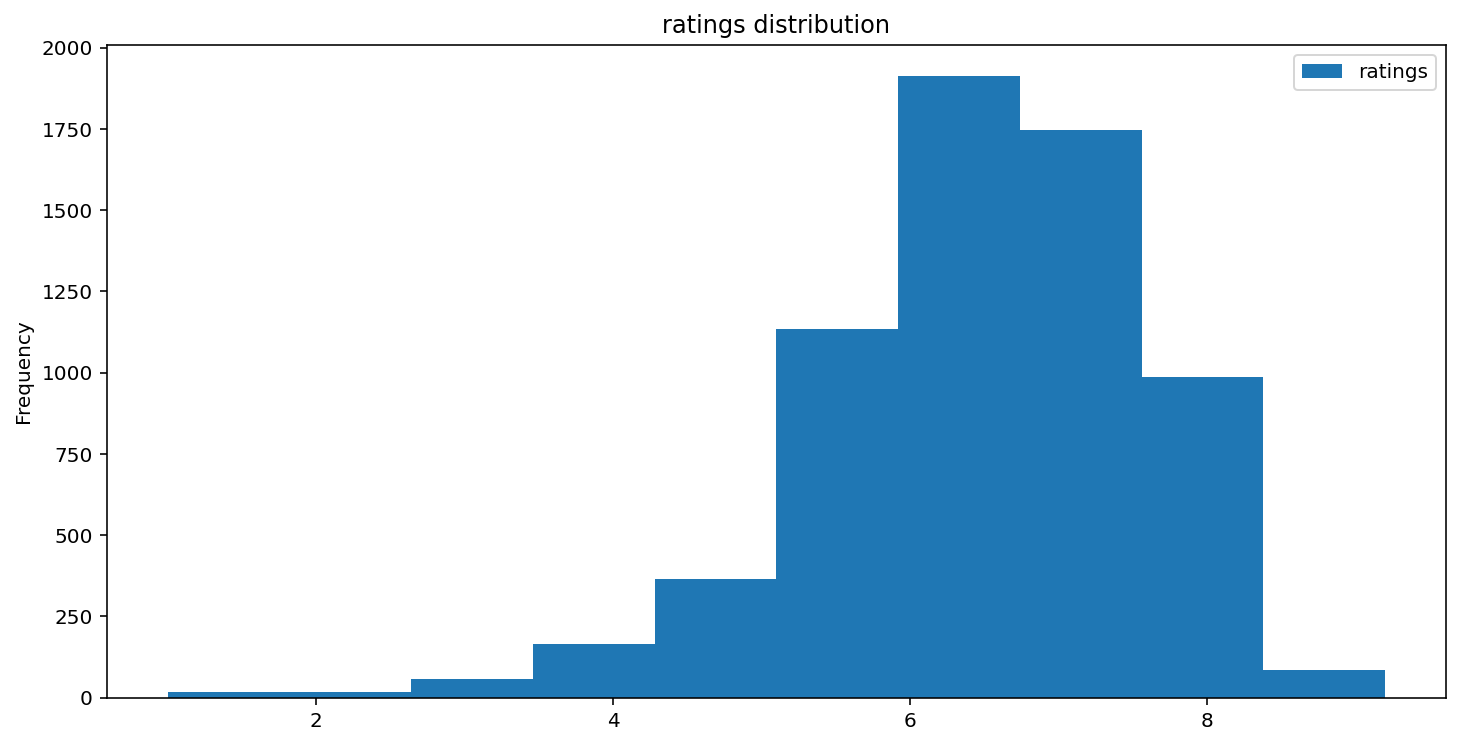

In [46]:
# Проверим количественные значения в столбце 'ratings'. Чтобы увидеть, какие значения принимает этот столбец,
# воспользуемся гистограммой

df.plot(y='ratings', kind='hist', figsize=(12, 6), title='ratings distribution')

В значениях столбца 'ratings' всё в порядке: они положительные и находятся в диапазоне от 0 до 10. Можно заметить, что наиболее часто встречаютс фильмы с рейтингом от 6 до 7.5.

<AxesSubplot:title={'center':'box office distribution'}, ylabel='Frequency'>

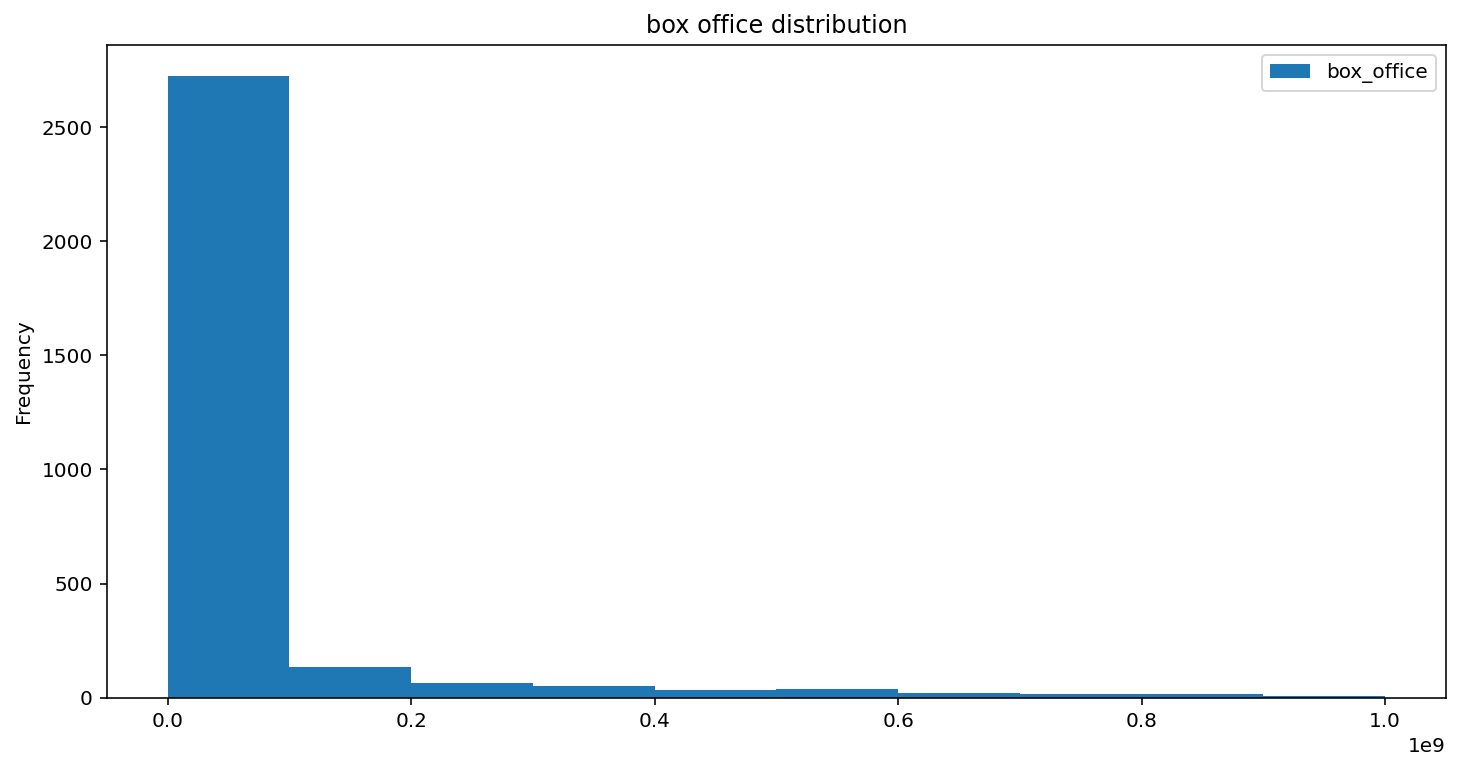

In [47]:
# Проверим количественные значения в столбце 'box_office'. Чтобы увидеть, какие значения принимает этот столбец,
# мы так же воспользуемся гистограммой

df.plot(y='box_office', kind='hist', figsize=(12, 6), title='box office distribution', range=(0, 1e9))

Данные о сборах в прокате так же в порядке: они положительные и их большая часть находится в диапазоне значений от 0 до 0.1 миллиардов, что выглядит вполне естественно.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера (v.2)</b>  
    
Супер! 🖖
    
</div>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [48]:
df['show_start_year'] = df['show_start_date'].dt.year
df.tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,0.0,Без финансирования,NaN,NaN,NaN,2019
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Без финансирования,5.4,"боевик,триллер",NaN,2019
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,Без финансирования,NaN,NaN,NaN,2019
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,Без финансирования,NaN,NaN,NaN,2019
7484,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,Без финансирования,6.3,"комедия,вестерн",NaN,2019


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [49]:
# Объявим функцию одной строки и зададим ей дополнительный параметр part, от значения которого будет зависеть, имя или фамилию
# возвращает функция: part по умолчанию будет равен строке 'name' и в таком значении функция вернёт имя.




def get_first_and_last_name(row, part='name'):
    # На случай обработки пропусков будем использовать конструкцию try-except
    try:
        fullname = row['director'] # Очередное значение столбца 'director' сохраняем в переменной fullname
        listname = fullname.split(' ') # Применяем к нему метод split() и разделяем по пробелу
        if len(listname) < 2: # Если после разделения список содержит меньше двух элементов (то есть один)
            if '.' in str(listname[0]): # И если этот элемент содержит символ точки 
                listname = str(listname[0]).split('.') # Разбиваем этот единственный элемент на список по разделителю-точке
                name = listname[0] # Переменная name принимает имя
                surname = listname[1].strip(',') # Переменная surname принимает фамилию
                if part == 'name': # Если значение параметра part равно строке 'name', функция вернёт имя
                    return name 
                return surname # Иначе функция вернёт фамилию
            elif ',' in str(listname[0]): # Eсли единственный элемент содержит символ запятой
                listname = str(listname[0]).split(',') # Разбиваем этот единственный элемент на список по разделителю-запятой
                name = listname[0] # Переменная name принимает имя
                surname = listname[1].strip(',') # Переменная surname принимает фамилию
                if part == 'name': # Если значение параметра part равно строке 'name', функция вернёт имя
                    return name 
                return surname # Иначе функция вернёт фамилию
            else: # Иначе
                counter = 0 # Объявим переменную-счётчик для подсчёта заглавных букв в строке 
                index = 0 # Объявим переменную, которая будет хранить номер индекса второй заглавной буквы
                for i in range(len(str(listname[0]))): # Запустим цикл по символам строки
                    if str(listname[0])[i] != str(listname[0])[i].lower(): # Если буква заглавная
                        counter += 1 # Счётчик увеличиваем
                        index = i # Переменная индекс принимает значение последней заглавной буквы (мы ожидаем, что их две)
                if counter > 1: # Если больших букв в строке больше одной (то есть две)
                    name = str(listname[0])[:index] # Именем будем считать символы до второй закглавной буквы
                    surname = str(listname[0])[index:] # Фамилией будем считать символы со второй заглавной буквы
                    if part == 'name':
                        return name
                    return surname
                if str(listname[0]) == 'Мадонна': # В конкретном случае с Мадонной будем заполнять оба столбца Мадонной.
                    return 'Мадонна'
                name = 'Нет данных'
                surname = fullname
                if part == 'name':
                    return name
                return surname
        
        if listname[0][-1] == ',': # На этом этапе мы ожидаем, что listname содержит 2 и больше элементов. 
            # Проверяем, оканчивается ли первый элемент на запятую. Если оканчивается, то разбиваем первый элемент на список
            listname = str(listname[0]).split('.') # Разделителем будет выступать точка
            name = listname[0]
            surname = listname[1].strip(',')
            if part == 'name':
                return name
            return surname
        if listname[1][0] == '(': # Проверяем, начинается ли второй элемент списка на символ открывающей круглой скобки
            if fullname == 'Зося (София) Родкевич': # Разбираем конкретный случай
                name = 'Зося'
                surname = 'Родкевич'
                if part == 'name':
                    return name
                return surname  
            # Если начинается (например, в случае с псевдонимами — разбиваем первый элемент на список по точке)
            listname = str(listname[0]).split('.')
            name = listname[0]
            surname = listname[1].strip(',')
            if part == 'name':
                return name
            return surname
        name = listname[0]
        surname = listname[1].strip(',')
        if part == 'name':
            return name
        return surname
    except: # Если выполнение функции привело к ошибке (мы ожидаем её в случае работы со значением NaN)
        name = 'Нет данных'
        surname = 'Нет данных'
        if part == 'name':
            return name
        return surname
    
df['director_name'] = df.apply(get_first_and_last_name, axis=1) # Создаём столбец с именем
df['director_surname'] = df.apply(get_first_and_last_name, part='surname', axis=1) # Создаём столбец с фамилией


df.head(50) # Убедимся, что учли все возможные случаи для разделения данных из столбца 'director'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_name,director_surname
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,Без финансирования,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин,Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,Без финансирования,6.6,"драма,военный",NaN,2016,Е,Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур,Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур,Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур,Бекмамбетов
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,Без финансирования,7.7,драма,NaN,2016,В,Абдрашитов
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,Без финансирования,8.3,"мелодрама,комедия",2700.0,2013,В,Меньшов
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.0,0.0,0.0,Без финансирования,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон,Туртурро
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.0,0.0,0.0,Без финансирования,8.0,"комедия,криминал",NaN,2016,Эрик,Беснард
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,Без финансирования,7.8,"мелодрама,комедия",NaN,2014,В,Титов


<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Подозреваю, что эта функция забрала у тебя много сил, но оно того стоило 👏 Теперь у тебя есть возможность выбрать неявные дубликаты по разному записанных главных режиссеров :)
    
Хоть и можно было справиться с этой частью задания несколько проще, выбирая только первый элемент из образующегося после разделения списка:
    
    
```def get_first_value(s, sep = ','):
    """
    Функция для выбора первого элемента из перечисления
    """
    value_lst = s.split(sep=sep)
    return value_lst[0]```
    
</div>

<div class="alert alert-danger">
<b> 👨‍🚒  Комментарий ревьюера</b> 
    
Думаю, что совет выше пригодится, так как ты не сделал отдельный столбец с "основным жанром" 👀

</div>

 
 
 
 <div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b> Спасибо за совет! Воспользуюсь им буквально четырьмя ячейками ниже, чтобы создать столбец с "основным жанром" :)</div>    


</div>  

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера (v.2)</b>  
    
Всегда поалуйста 😅
    
</div>

In [50]:
# Также убедились, что число строк в столбце фамилии директора в значении "Нет данных" совпадает с числом пропусков
# В столбце 'director'

len(df.query('director_surname == "Нет данных"')) == len(df[df['director'].isna()])

True

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [51]:
# Результаты в значениях столбца округлим до двух знаков после запятой

df['part_of_support'] = round((df['refundable_support'] + df['nonrefundable_support']) / df['budget'], 2)
df.query('budget > 0 and refundable_support > 0 and nonrefundable_support > 0').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_name,director_surname,part_of_support
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7,2015,Р,Давлетьяров,0.68
1986,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.0,30000000.0,80000000.0,Фонд кино,5.0,"семейный,комедия",121225633.8,2014,Максим,Свешников,0.70
2004,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,30000000.0,40000000.0,252489571.0,Фонд кино,6.5,"мультфильм,фэнтези,приключения",313489846.5,2014,А,Цицилин,0.28
2141,Территория,111000515,2015-01-27 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,30000000.0,30000000.0,500000000.0,Фонд кино,6.8,"детектив,фэнтези,триллер",72578317.4,2015,А,Мельник,0.12
2287,12 месяцев. Новая сказка,111014414,2014-10-16 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Никола-фильм"", ООО ""Инвестмен...",Россия,Д.Елеонский,И.Каленов,«0+» - для любой зрительской аудитории,15000000.0,5000000.0,90120000.0,Фонд кино,3.8,"семейный,фэнтези",32244810.0,2014,Д,Елеонский,0.22


<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
    
Отлично :)
    
</div>

In [52]:
# Напишем функцию, которая создаст столбец с основным жанром

def get_main_genre(s, sep=','):
    value_lst = str(s).split(sep=sep)
    return value_lst[0]

df['main_genre'] = df['genres'].apply(get_main_genre)

display(df.head(5)) # Убедились в том, что работа функции прошла успешно

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,director_name,director_surname,part_of_support,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,...,0.0,Без финансирования,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин,Костнер,NaN,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,...,0.0,Без финансирования,6.6,"драма,военный",NaN,2016,Е,Матвеев,NaN,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,...,0.0,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур,Бекмамбетов,NaN,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,...,0.0,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур,Бекмамбетов,NaN,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,...,0.0,Без финансирования,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур,Бекмамбетов,NaN,фантастика


<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера (v.2)</b>  
    
Вот теперь комар носа не подточит
    
    
![](https://i.gifer.com/9MwH.gif)
    
</div>

In [53]:
# Также убедились в том, что столбец не содержит пропусков
df['main_genre'].isna().sum()

0

<AxesSubplot:title={'center':'main genres distribution'}, xlabel='main_genre'>

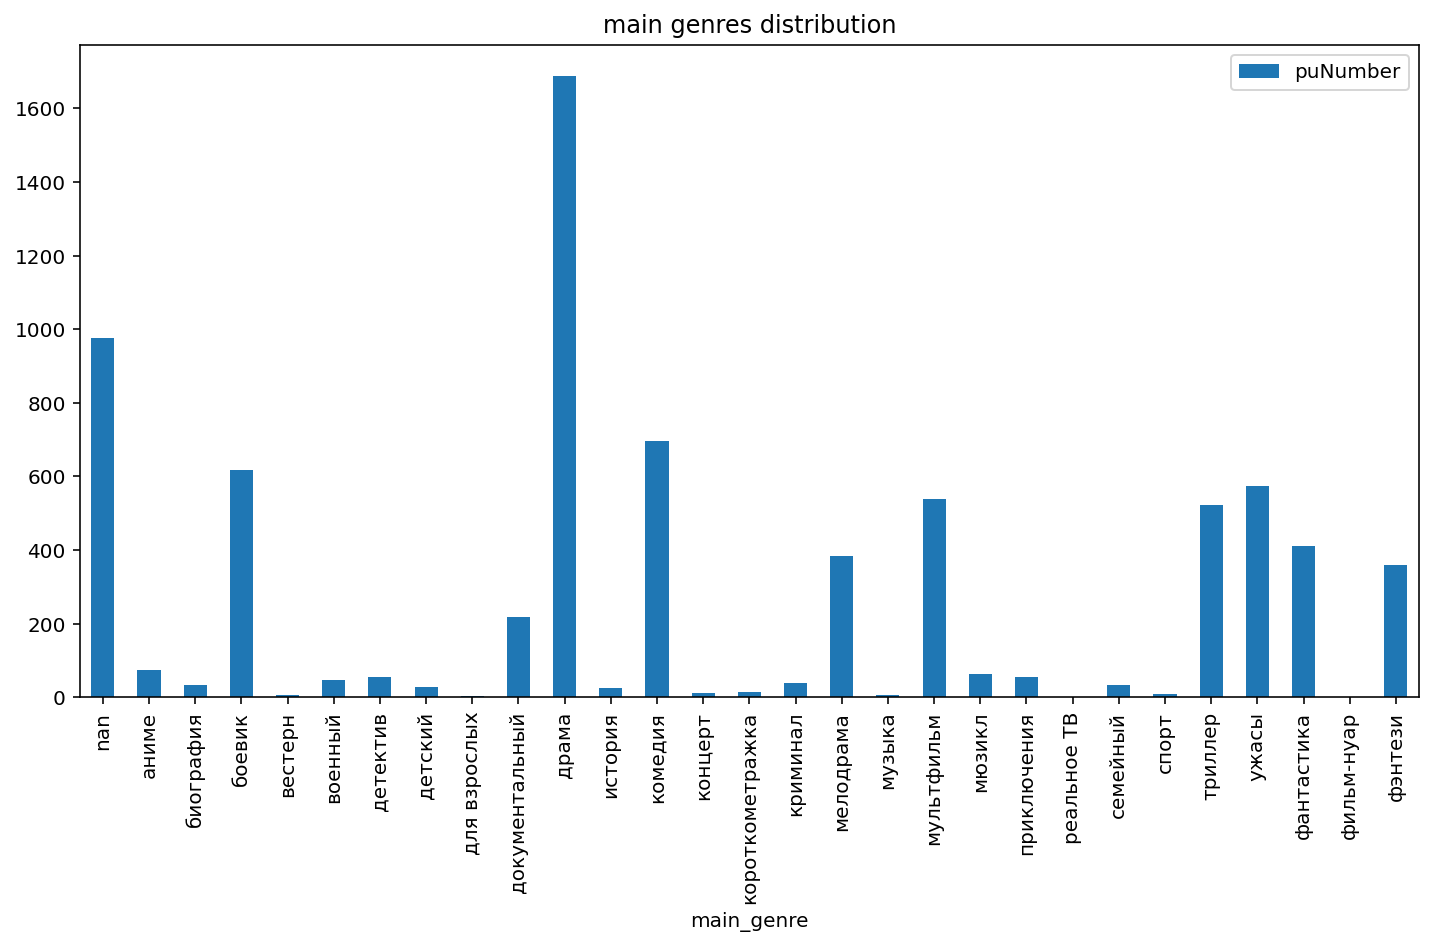

In [54]:
# Так как пропуски могли стать строковым значением, построим график барплот, который покажет количество фильмов
# снятых в основных жанрах.

df.pivot_table(index='main_genre', values='puNumber', aggfunc='count').plot(kind='bar', figsize=(12, 6), title='main genres distribution')

Действительно, среди жанров встречается жанр 'nan' (это строка), которого не должно быть. Изучим данные, которые имеют жанр 'nan'. Предположим, что основной жанр 'nan' возник вследствие пропуска в столбце 'genres'. Если это так, то количество строк с пропусками в столбце 'genres' и количество строк с жанром 'nan' в столбце 'main_genre' будет совпадать.

In [55]:
# Количество строк совпадает
len(df.query('main_genre == "nan"')) == len(df[df['genres'].isna()])

True

In [56]:
# Заменим жанр 'nan' на 'другое'
df.loc[df['main_genre'] == 'nan', 'main_genre'] = 'другое'

<AxesSubplot:title={'center':'main genres distribution'}, xlabel='main_genre'>

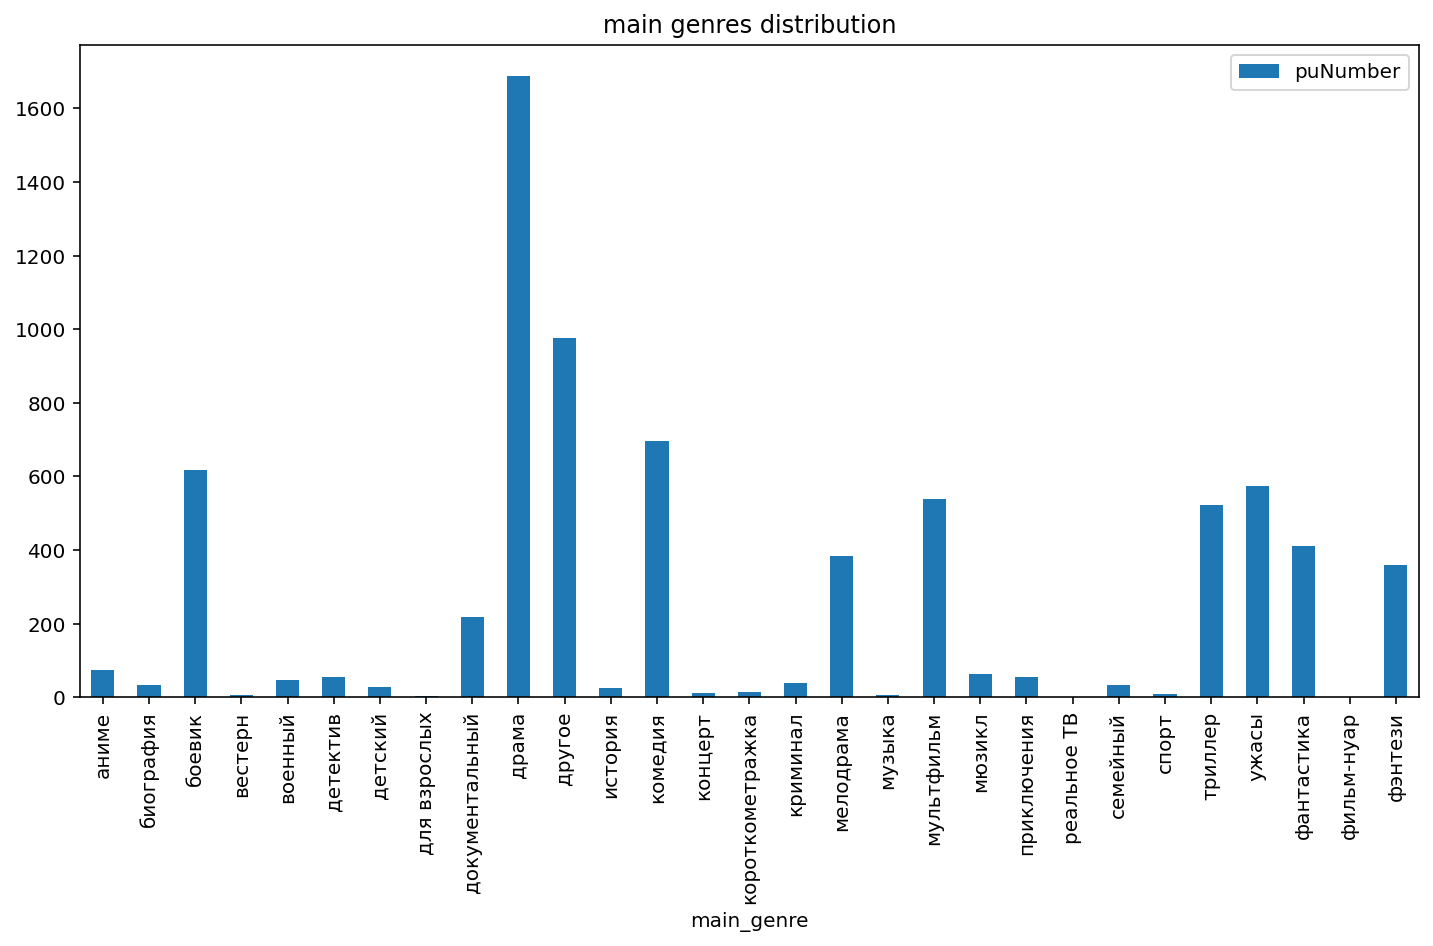

In [57]:
# Убедимся, что изменения вступили в силу
df.pivot_table(index='main_genre', values='puNumber', aggfunc='count').plot(kind='bar', figsize=(12, 6), title='main genres distribution')

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

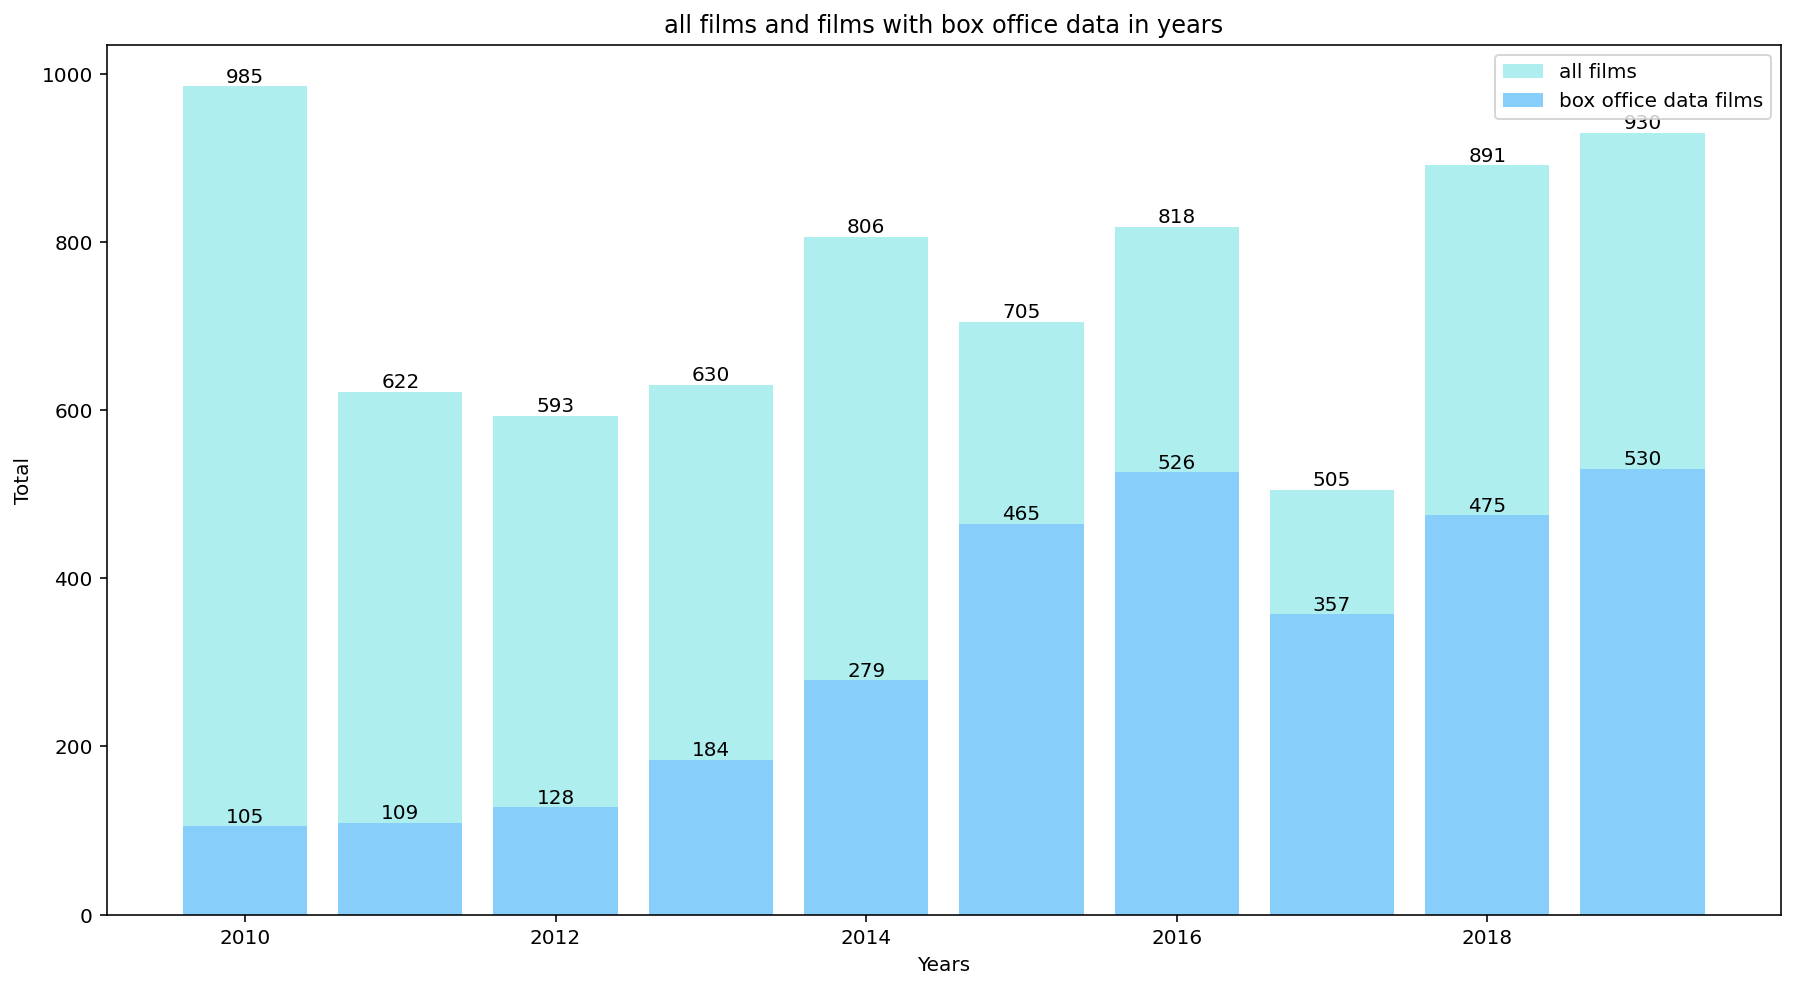

In [58]:
# Создадим сводную таблицу, в которой разместим данные о количестве всех вышедших фильмов по годам

all_films_to_years = df.pivot_table(index='show_start_year', values='puNumber', aggfunc='count')
all_films_to_years.columns = ['count']
all_films_to_years['year'] = all_films_to_years.index
all_films_to_years.reset_index(drop=True, inplace=True)

# Создадим сводную таблицу, в которой разместим данные о количестве вышедших фильмов, для которых известны
# значения кассовых сборов по годам

box_office_films_to_years = df[~df['box_office'].isna()].pivot_table(index='show_start_year', values='puNumber', aggfunc='count')
box_office_films_to_years.columns = ['count']
box_office_films_to_years['year'] = box_office_films_to_years.index
box_office_films_to_years.reset_index(drop=True, inplace=True)

# Отобразим значения с помощью графиков барплот.

fig = plt.figure(figsize=(15, 8))

a = plt.bar(all_films_to_years['year'], all_films_to_years['count'], color='PaleTurquoise', label='all films')

# Зададим подписи для первого графика (в seaborn это проще, захотелось попрактиковать подписи, как показывал наставник)

for rect, label in zip(a.patches, all_films_to_years['count']):
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )
    
b = plt.bar(box_office_films_to_years['year'], box_office_films_to_years['count'], color='LightSkyBlue', label='box office data films')


for rect, label in zip(b.patches, box_office_films_to_years['count']):
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )

plt.legend()
plt.title('all films and films with box office data in years')
plt.xlabel('Years')
plt.ylabel('Total')

plt.show()


На графике можно увидеть общее количество фильмов, которые вышли в прокат в период с 2010 по 2019-й годы и количество фильмов, для которых есть данные о сборах. Можно заметить, что с каждым годом доля фильмов без данных о сборах в основном уменьшается. 

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Отличное визуальное решение поставленной задачи :) Мы здесь и абсолютные и относительные величины можем оценить
</div>

In [59]:
all_films = all_films_to_years['count'].sum()
films_with_box_office_data = box_office_films_to_years['count'].sum()

films_part_with_data =  round(films_with_box_office_data / all_films, 3)

print("Доля фильмов с данными о прокате составляет {:.1%}".format(films_part_with_data))

Доля фильмов с данными о прокате составляет 42.2%


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

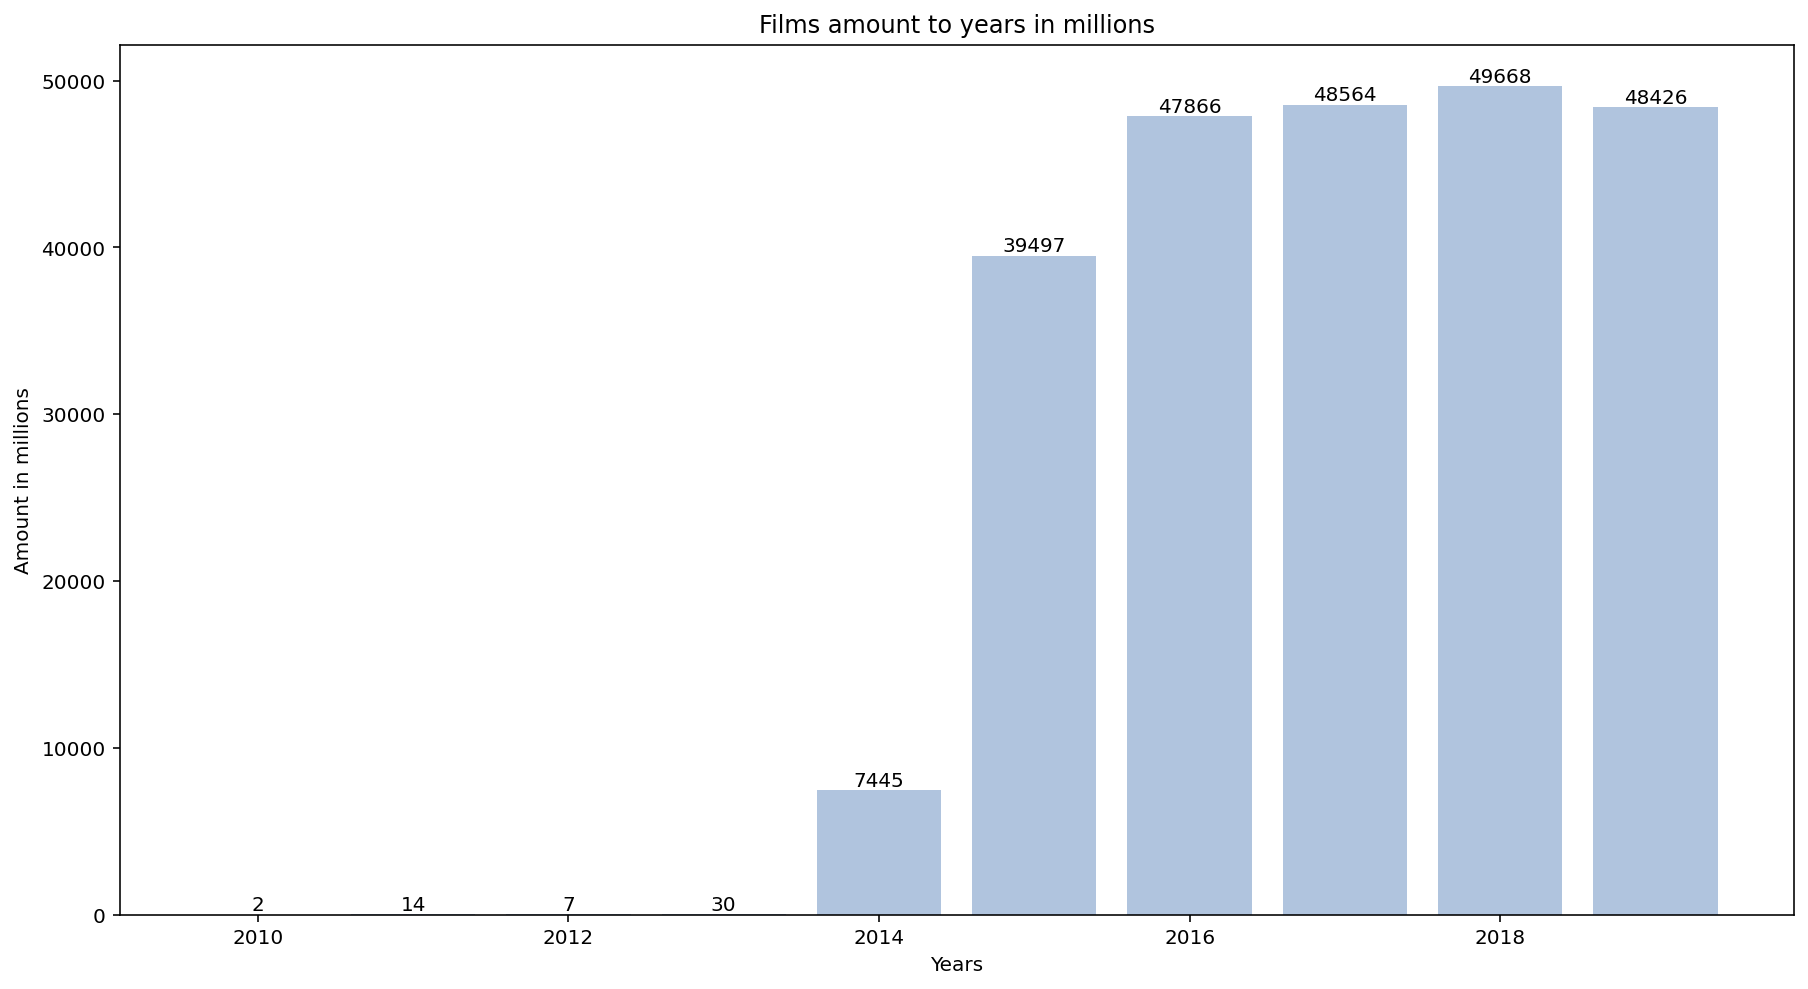

In [60]:
# Создадим сводную таблицу, в которой будут данные о сумме сборов за каждый год

box_office_amount_to_years = df[~df['box_office'].isna()].pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
box_office_amount_to_years.columns = ['amount']
box_office_amount_to_years['amount'] = round(box_office_amount_to_years['amount'] / 1000000, 0) # Переведём значения сборов в миллионы
box_office_amount_to_years['amount'] = box_office_amount_to_years['amount'].astype('int') # Целые числа читать удобнее
box_office_amount_to_years['year'] = box_office_amount_to_years.index
box_office_amount_to_years.reset_index(drop=True, inplace=True)

fig = plt.figure(figsize=(15, 8))

a = plt.bar(box_office_amount_to_years['year'], box_office_amount_to_years['amount'], color='LightSteelBlue')

for rect, label in zip(a.patches, box_office_amount_to_years['amount']): 
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )
plt.title("Films amount to years in millions")
plt.ylabel('Amount in millions')
plt.xlabel('Years')

plt.show()

По графику можно заметить, что в последние годы сумма кассовых сборов существенно увеличилась. Минимальное значение соответствует 2010-му году — 2,43 миллиона, а максимальное значение — 2018-му году: почти 50 миллиардов. Начиная с 2015-го значение суммы сборов проката не опускалось ниже показателя в 39 миллиардов. Это говорит о положительной динамике роста сборов в прокате кино.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Красивое оформление и вывод хороший
</div>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

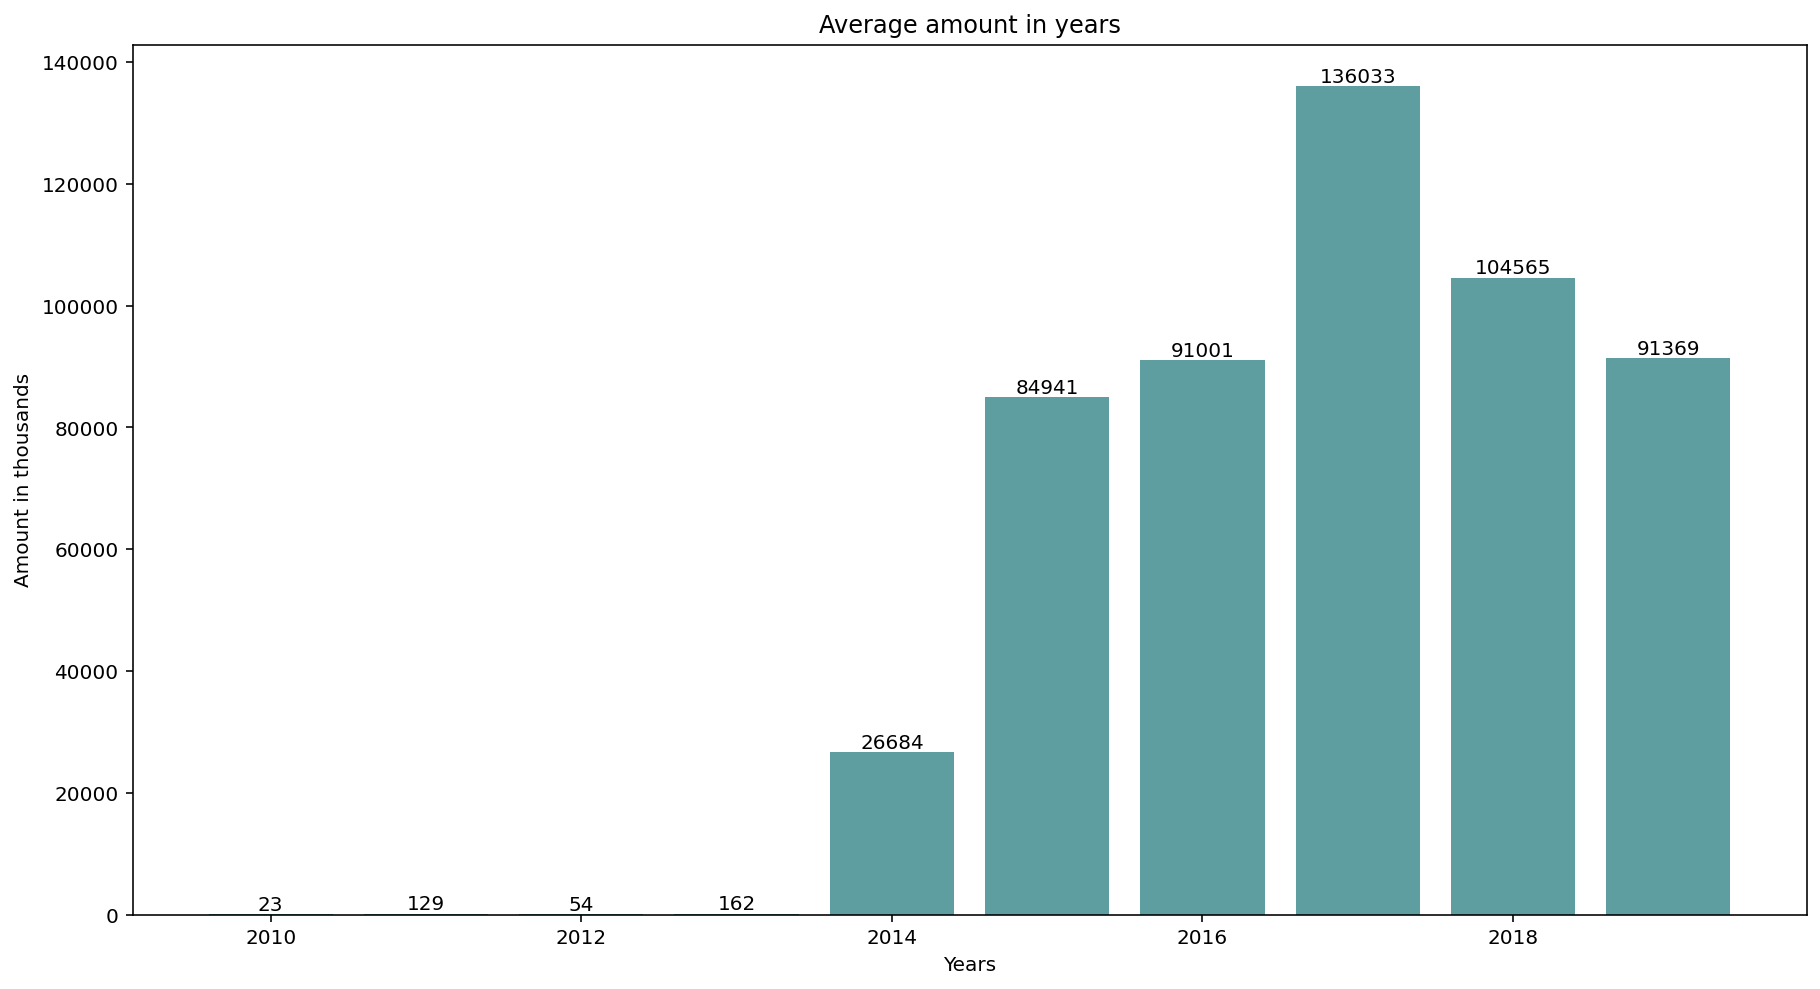

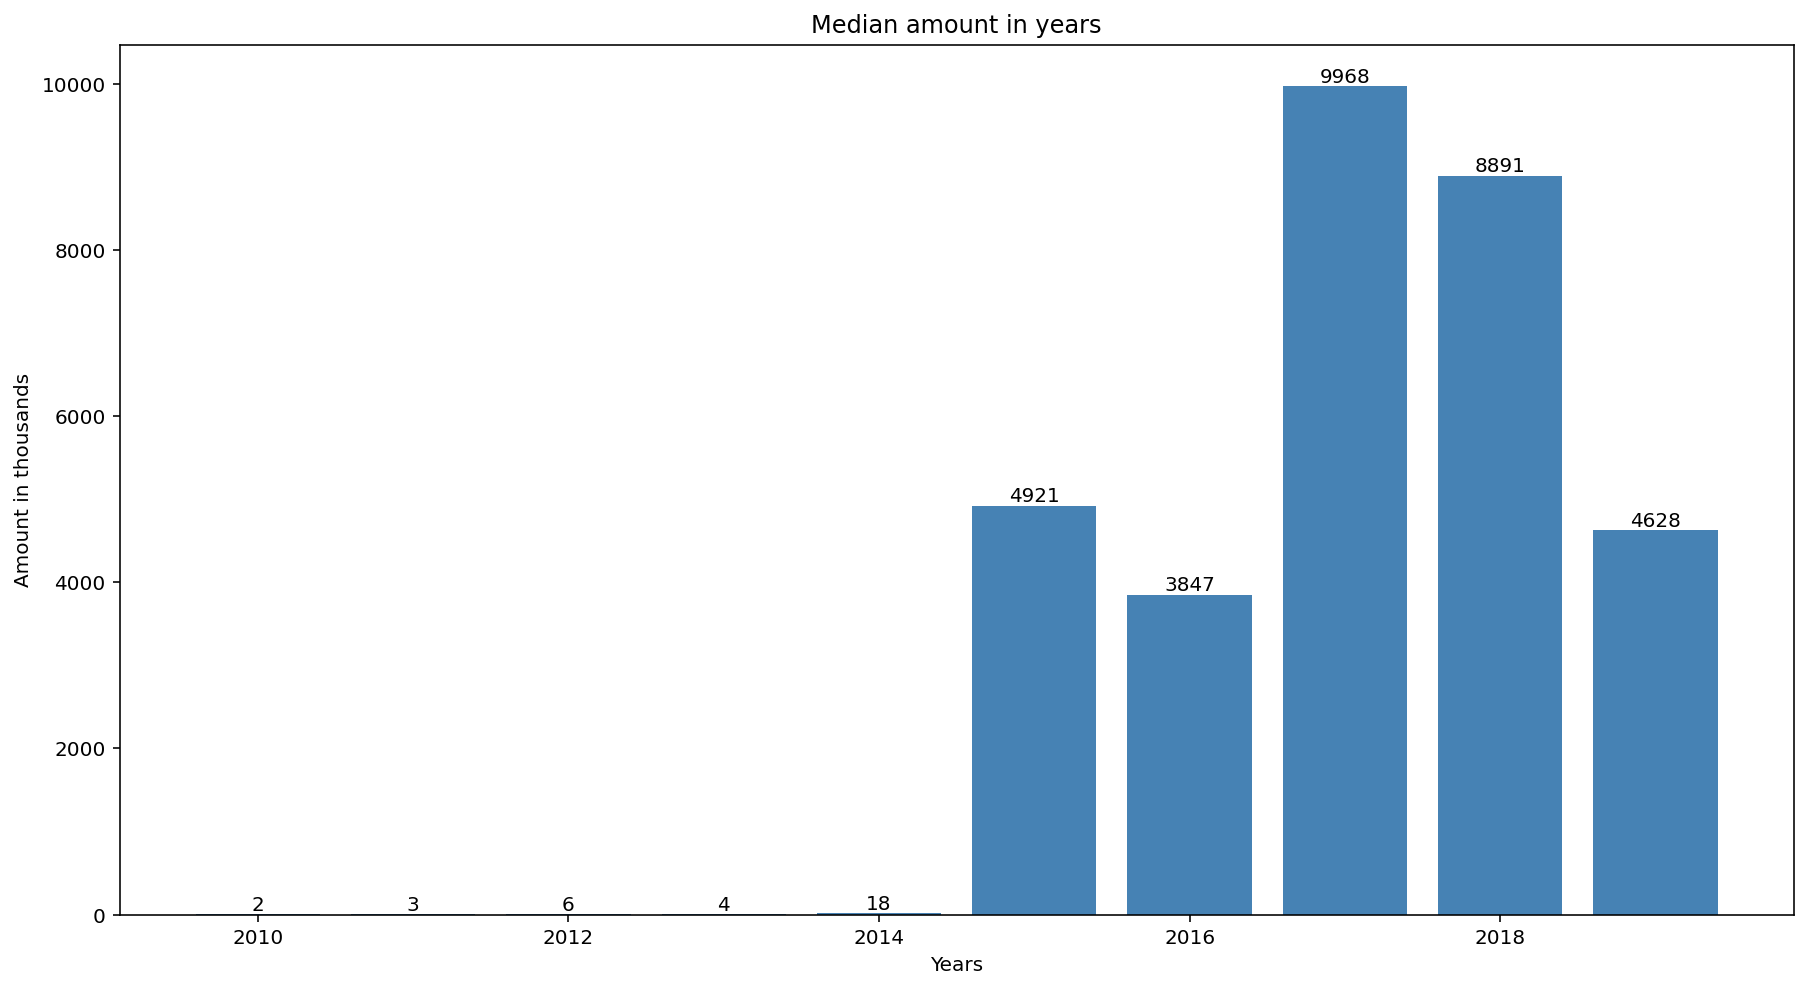

In [61]:
# Создадим сводную таблицу, в которой будут данные о среднем и медианном значении сборов за каждый год

average_and_median_amounts = df[~df['box_office'].isna()].pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
average_and_median_amounts.columns = ['mean', 'median']
average_and_median_amounts['year'] = average_and_median_amounts.index
average_and_median_amounts['mean'] = round(average_and_median_amounts['mean'] / 1000, 0) # Переведём значения в тысячи
average_and_median_amounts['median'] = round(average_and_median_amounts['median'] / 1000, 0) # Переведём значения в тысячи

average_and_median_amounts['mean'] = average_and_median_amounts['mean'].astype('int') # Целые числа читать удобнее
average_and_median_amounts['median'] = average_and_median_amounts['median'].astype('int')
average_and_median_amounts.reset_index(drop=True, inplace=True)

fig = plt.figure(figsize=(15, 8))

a = plt.bar(average_and_median_amounts['year'], average_and_median_amounts['mean'], color='CadetBlue')

for rect, label in zip(a.patches, average_and_median_amounts['mean']): 
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )
    
plt.title("Average amount in years")
plt.ylabel('Amount in thousands')
plt.xlabel('Years')
plt.show()

fig = plt.figure(figsize=(15, 8))

b = plt.bar(average_and_median_amounts['year'], average_and_median_amounts['median'], color='SteelBlue')

for rect, label in zip(b.patches, average_and_median_amounts['median']): 
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )
    
plt.title("Median amount in years")
plt.ylabel('Amount in thousands')
plt.xlabel('Years')
plt.show()


По графикам можем заметить максимумы в значениях среднего и медианы на 2018-й год. Максимальное среднее значение примерно в 13 раз больше максимального среднего — это говорит о том, что в данных имеются выбросы. Крайне малые значения медианы и среднего в период с 2010-го по 2013-й годы, для медианы 2014-й год также прошёл в малом значении — 18 тысяч, тогда как среднее значение составляло уже 26,6 миллионов. Данные явно неоднородны и имеют высокую изменчивость.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
И снова отличная работа :)
</div>

<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b>


Многие встроенные методы можно применять сразу к нескольким столбцам
    
```average_and_median_amounts[['median', 'mean']].astype('int')```
    
</div>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [62]:
# Для исследования создадим таблицу new_df
new_df = df[~df['box_office'].isna()]
new_df = new_df.query('show_start_year >= 2015 and show_start_year <= 2019')

new_df = new_df[['show_start_year', 'age_restriction', 'box_office']] # Сократили число колонок до интересующих


new_df.reset_index(drop=True, inplace=True)

# Сгруппируем данные по году и возрастному ограничению, посчитаем среднее, сбросим индексы
mean_new_df = new_df.groupby(['show_start_year', 'age_restriction']).mean().reset_index()
mean_new_df['box_office'] = round(mean_new_df['box_office'] / 1000000, 2) # Перевели значения в миллионы

Text(0.5, 0, 'Years')

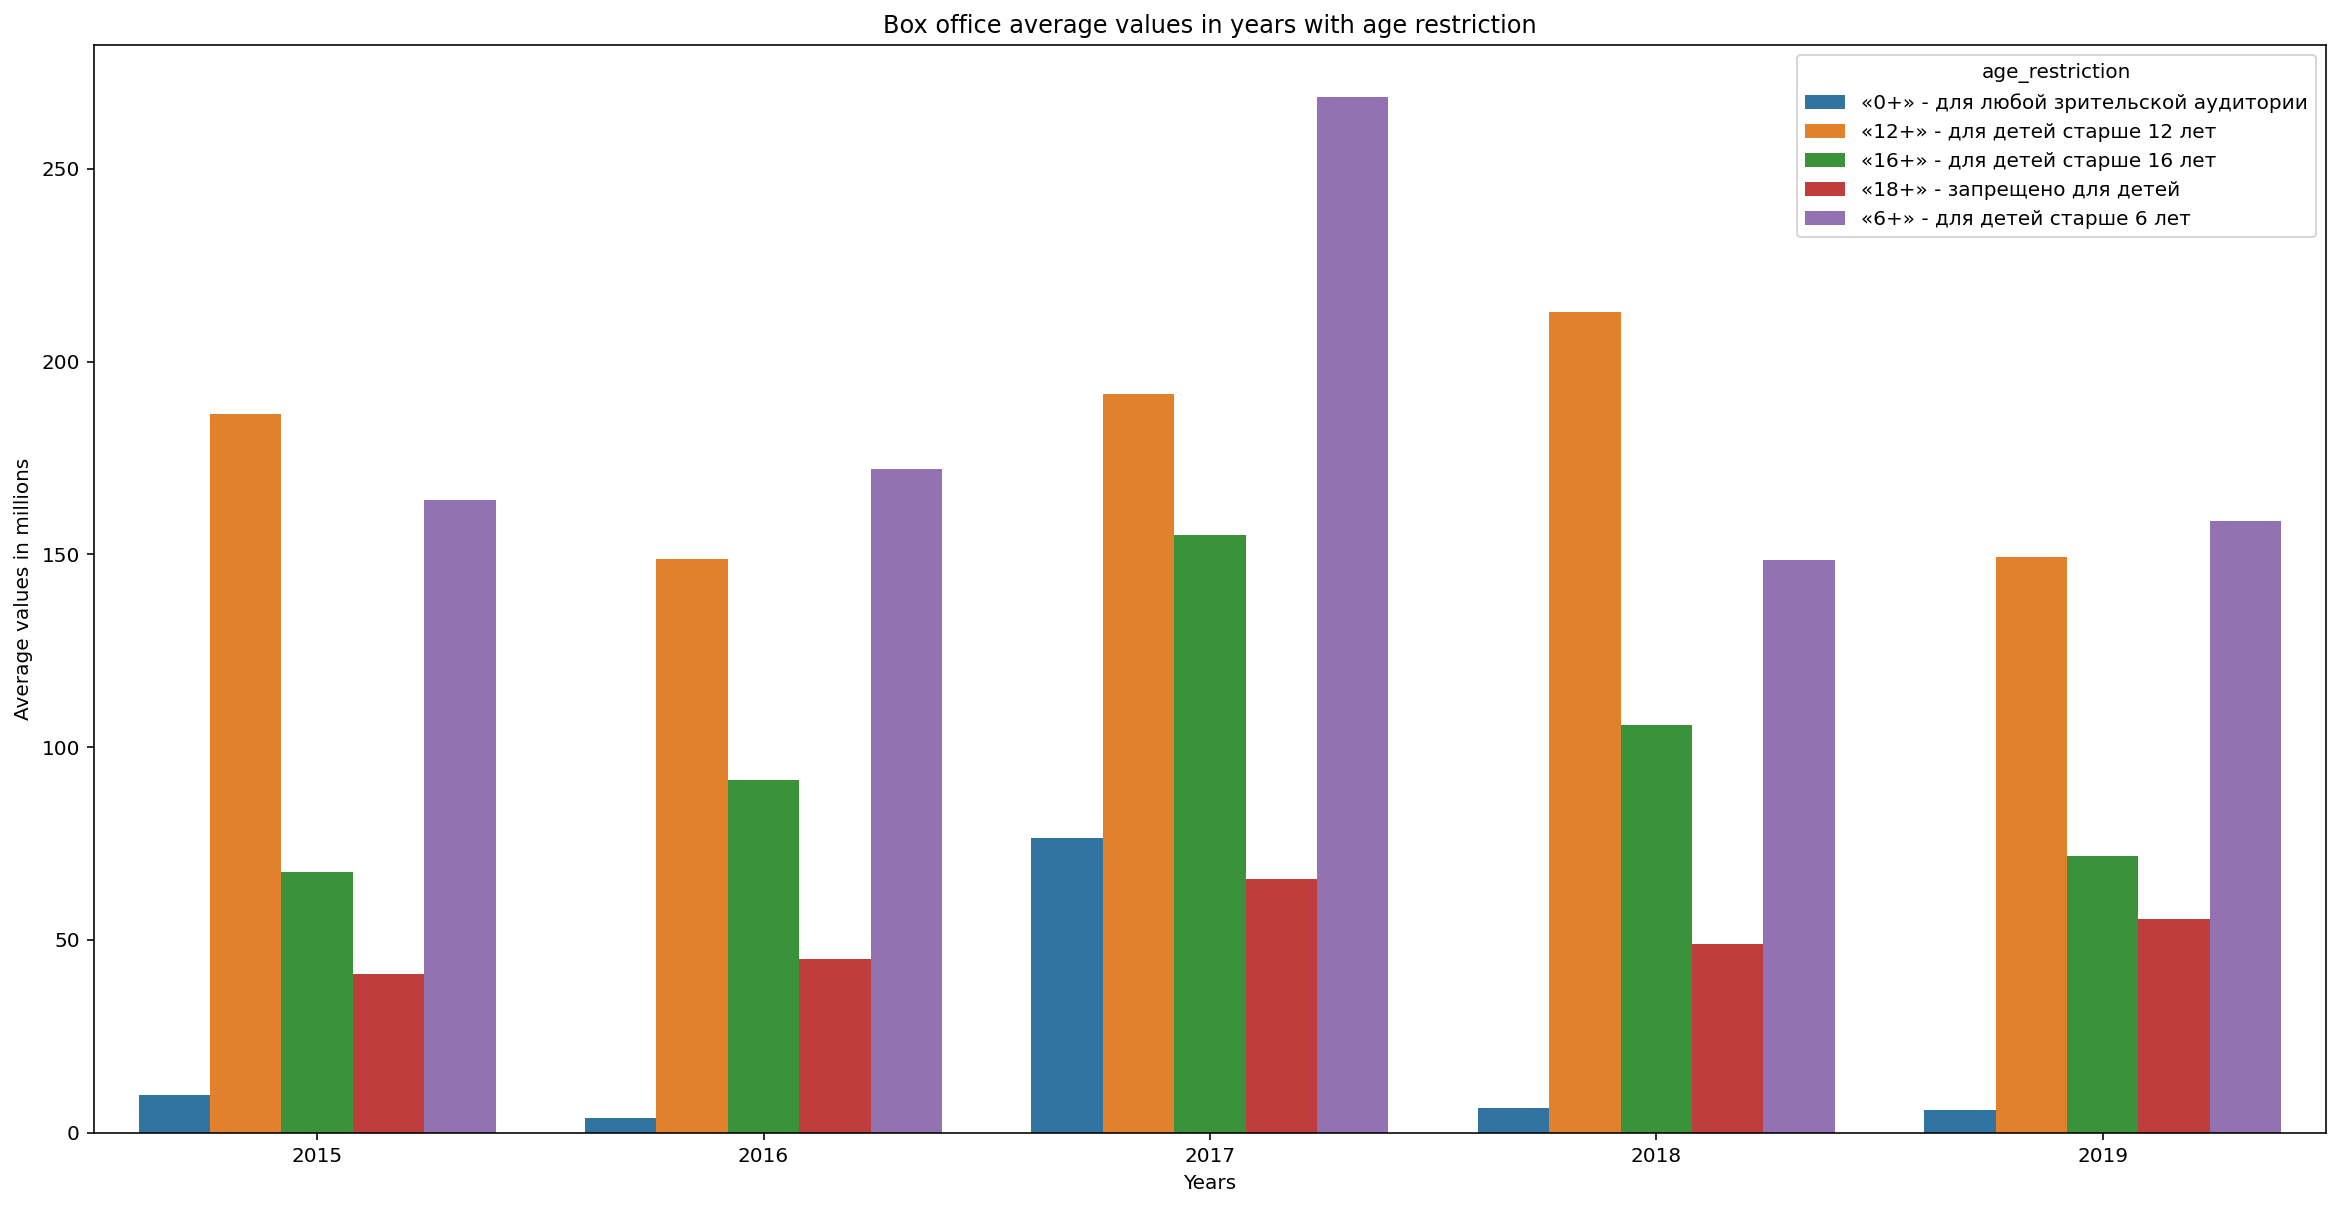

In [63]:
a = sns.barplot(x='show_start_year', y='box_office', hue='age_restriction', data=mean_new_df)
a.figure.set_figwidth(20)
a.figure.set_figheight(10)
a.set_title('Box office average values in years with age restriction')
a.set_ylabel('Average values in millions')
a.set_xlabel('Years')

На представленном графике мы видим, что наибольшее среднее значение сборов имеют картины с возрастным ограничением "6 +", при чём такое лидерство не стабильно: с 2015 по 2019-й годы картины с ограничением "6 +" имели наибольшее среднее значение сборов лишь трижды, а два раза (в 2015-м и 2018-м) лидерство сменялось в пользу среднего значения категории "12 +". В большинстве случаев разрыв между средними значениями обоих категорий незначителен, что может говорить нам о существовании выраженной конкуренции в прокате между картинами возрастных категорий "6 +" и "12 +".
Наименьшие сборы чаще всего имели фильмы категории "0 +". 
Можем также заметить стабильность среднего значения для категории "18 +": на исследуемом промежутке времени оно находится в районе значения в 50 миллионов и не сильно отклоняется от него. Взглянем на суммарные сборы фильмов каждой категории по годам.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
![](https://i.gifer.com/5rN.gif)
    
</div>

In [64]:
# Сгруппируем данные по году и возрастному ограничению, посчитаем сумму, сбросим индексы
sum_new_df = new_df.groupby(['show_start_year', 'age_restriction']).sum().reset_index()
sum_new_df['box_office'] = round(sum_new_df['box_office'] / 1000000000, 2) # Перевели значения в миллиарды

Text(0.5, 0, 'Years')

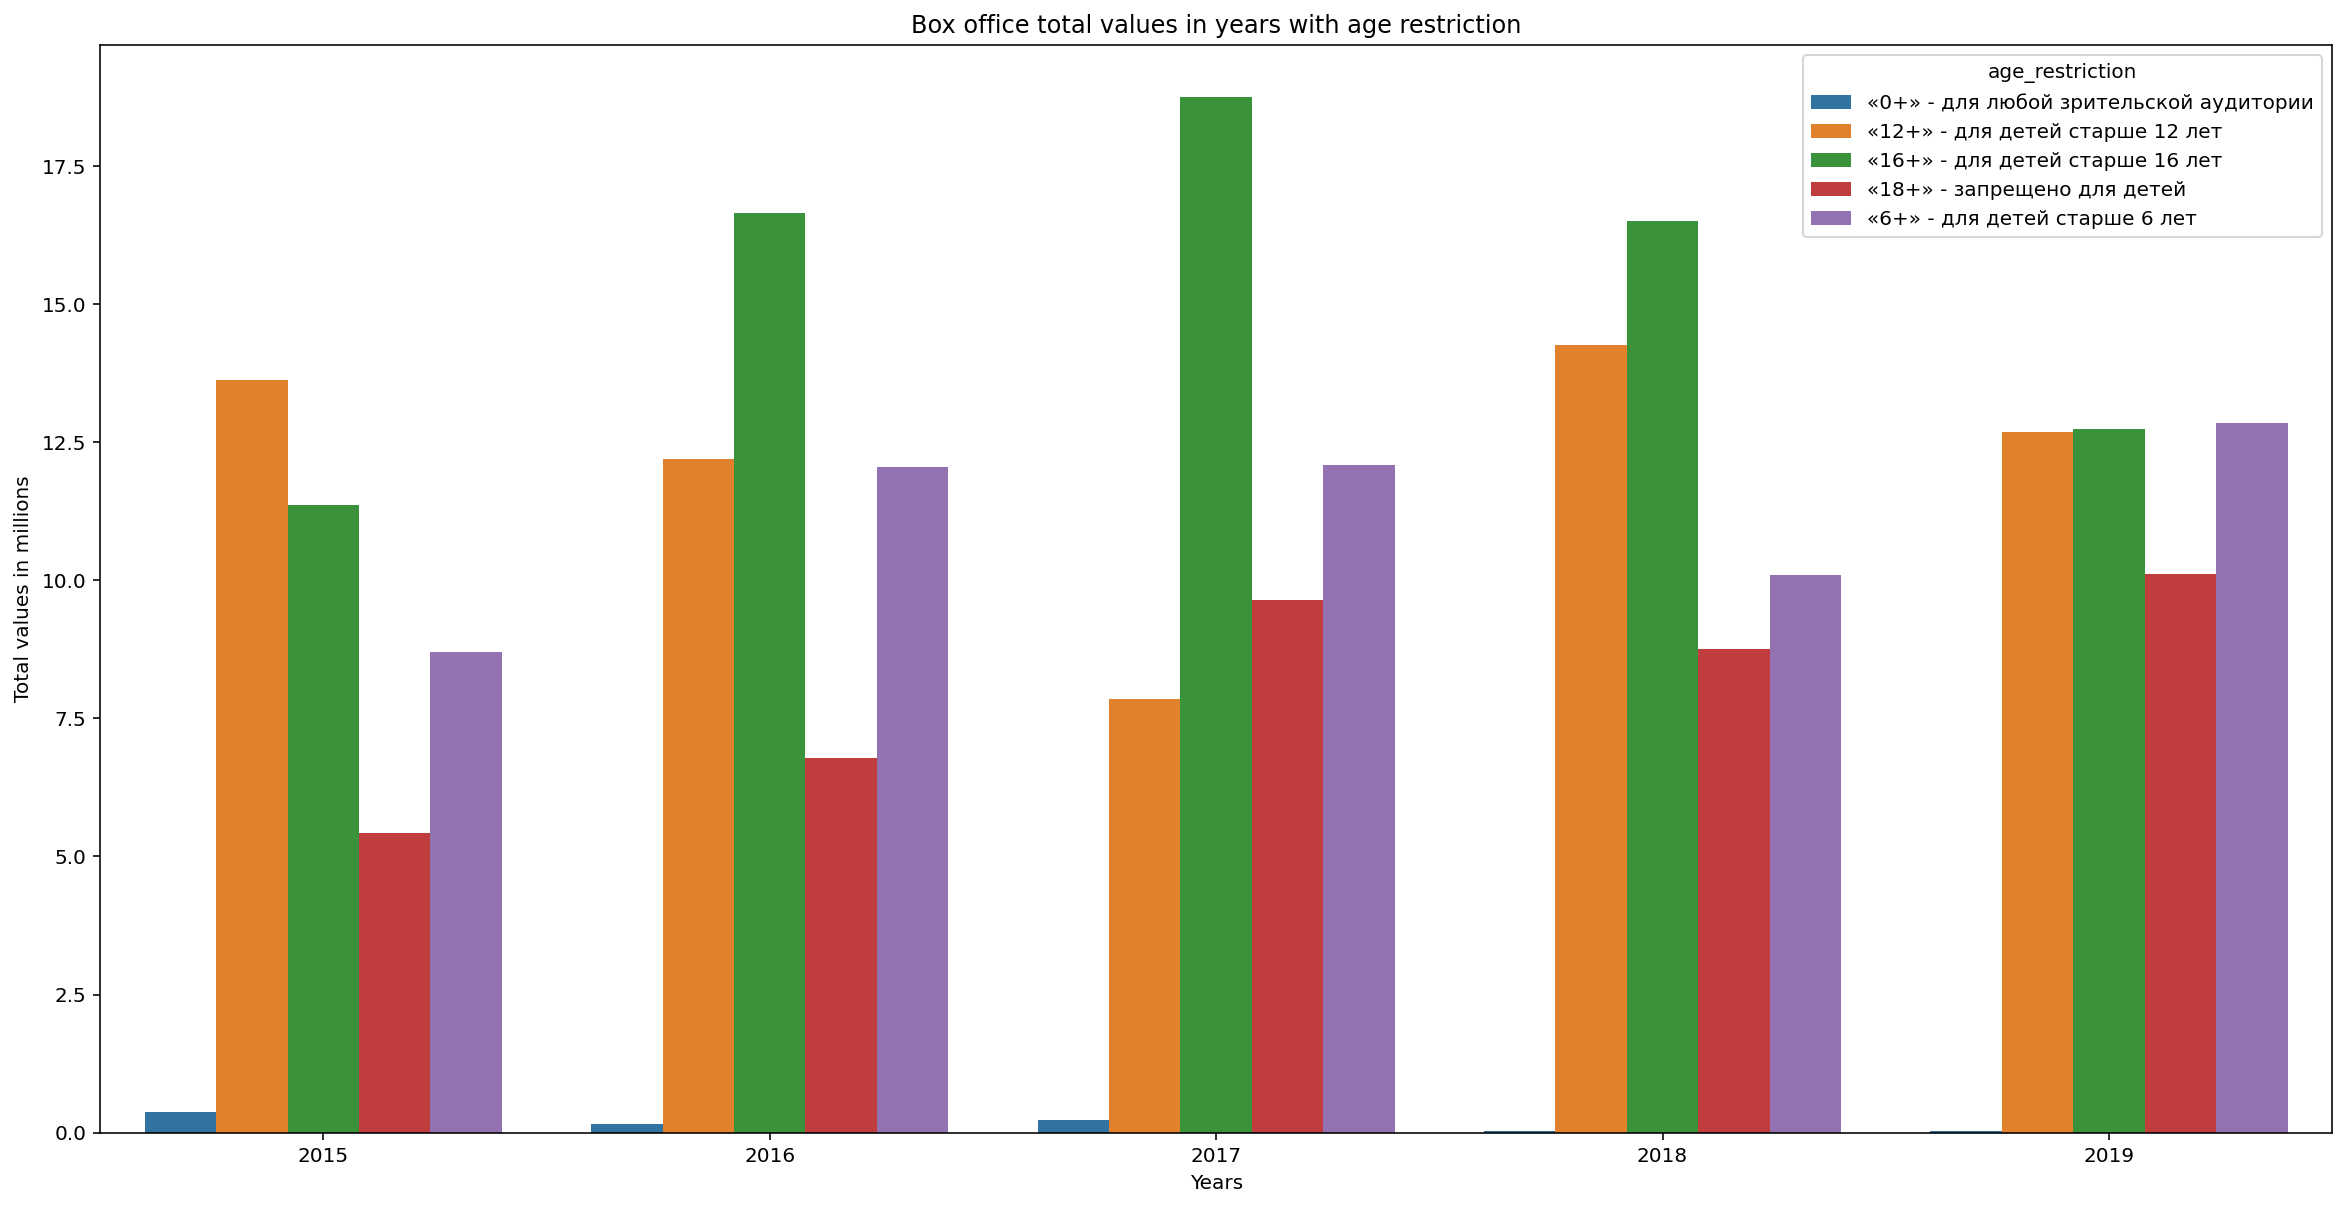

In [65]:
a = sns.barplot(x='show_start_year', y='box_office', hue='age_restriction', data=sum_new_df)
a.figure.set_figwidth(20)
a.figure.set_figheight(10)
a.set_title('Box office total values in years with age restriction')
a.set_ylabel('Total values in millions')
a.set_xlabel('Years')

Однако, больше всего денег в прокате собирают фильмы категории «16 +», конкуренцию по сумме сборов в течение года им составляют фильмы категории «12 +». Наимненьшие значения снова наблюдаем в категории «0 +», а категории «6 +» и «18 +» отличаются стабильностью, у них слабо выражена изменчивость в значениях суммы сборов по годам.

На обоих графиках мы видим, что самые большие значения, как по средним показателям, так и по суммам сборов приходятся на 2017 год, что может говорить о том, что в данных больше всего записей за этот год, либо (если это утверждение не верно) мы можем утверждать, что 2017 год — наиболее удачный для кинематографа, если отличается максимальными показателями при малом количестве записей.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Твое предположение о полноте данных мне нравится :)
    
</div>

In [66]:
new_df['show_start_year'].value_counts()

2019    530
2016    526
2018    475
2015    465
2017    357
Name: show_start_year, dtype: int64

Для 2017 года в наших данных меньше всего записей, а показатели у него самые высокие. Это заставляет нас принять за правду тот факт, что год действительно был удачным для кинематографа, что выражалось в высоких значениях кассовых сборов, как средних, так и суммарных. 2019-й год, напротив, имеет больше всего записей, а его показатели близки к минимальным по значениям средних сборов.
На основании двух графиков, построенных по значениям средних и суммарных сборов мы можем судить о том, как с 2015 по 2019-й годы менялись вкусы зрителя: в 2015-м году и по среднему и по суммарному значению лидирует категория «12 +». Далее мы видим, что максимальна суммарная выручка картин из категории «16 +», при этом максимальное среднее значение сборов принадлежит категории фильмов «6 +». Это может говорить о том, что фильмов категории «16 +» было больше.
Для 2019-го года мы видим примерно одинаковые значения для всех категорий по сумме сборов, с незначительным опережением выделяется категория фильмов «6 +», при чём максимум для средних значений также принадлежит этой категории.
Вкусы зрителя сместились от картин «12 +» к картинам «6 +» — наш зритель «помолодел» :)

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
И про подытог раздела не забыл, и про смайлики. <b>Так держать!</b>
    
</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [67]:
# Сохраним фильмы с государственной поддержкой в отдельной таблице
films_with_support = df.query('financing_source != "Без финансирования"')

films_with_support['box_office'] = round(films_with_support['box_office'] / 1000000, 3) # Приведём сборы к миллионам

# Создадим столбец 'all_support', который будет содержать сумму возвратных и невозвратных средств поддержки
films_with_support['all_support'] = films_with_support['refundable_support'] + films_with_support['nonrefundable_support']
films_with_support['all_support'] = round(films_with_support['all_support'] / 1000000, 3) # Приведём поддержку к миллионам
films_with_support.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,director_name,director_surname,part_of_support,main_genre,all_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",0.365,2013,А,Атанесян,0.33,драма,26.500
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,NaN,0.028,2014,А,Якимчук,0.70,другое,26.000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19.957,2013,Р,Давлетьяров,0.61,комедия,107.848
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,0.056,2014,Е,Миндадзе,0.69,драма,28.000
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,0.232,2014,М,Угаров,0.62,драма,25.000


<AxesSubplot:title={'center':'support total in years'}, xlabel='years', ylabel='support in millions'>

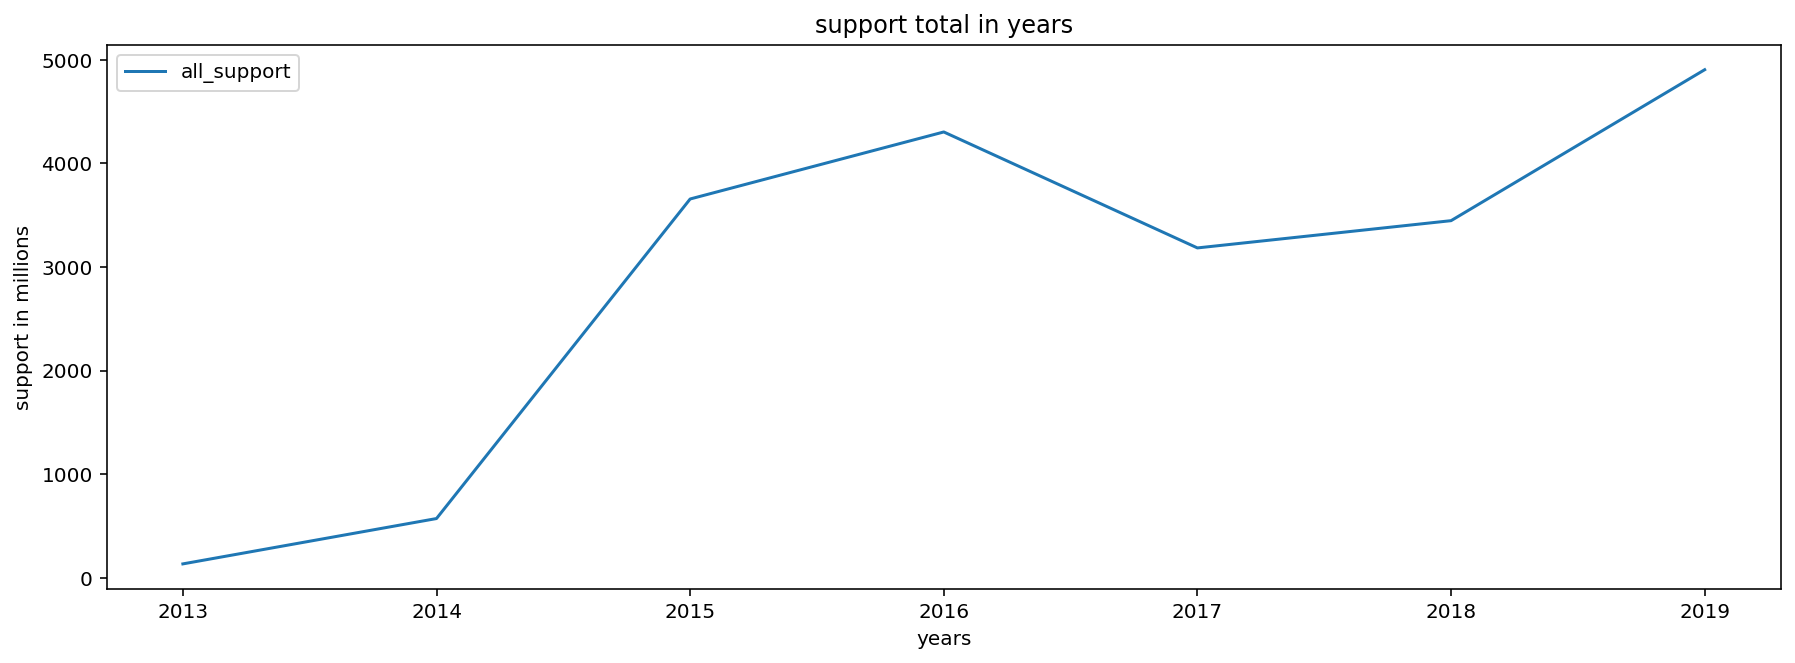

In [68]:
total_support_values = films_with_support.pivot_table(index='show_start_year', values='all_support', aggfunc='sum').reset_index()

total_support_values.plot(x='show_start_year', 
                          y='all_support', 
                          figsize=(15, 5), 
                          title='support total in years', 
                          ylabel='support in millions',
                         xlabel='years')



Объёмы государственной поддержки ежегодно растут. В 2015-м году произошёл резкий рост финансирования со стороны государства, с тех пор можно наблюдать, что ежегодно государство выделяет не менее 3 миллиардов на поддержку кинематографа. В дальнейшем исследовании будем использовать данные с 2015 по 2019 год. Проверим, существует ли зависимость между объёмом выделяемых со стороны государства средств и рейтингом фильма.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Согласна с решением использовать только актуальные данные
    
</div>

<AxesSubplot:ylabel='Frequency'>

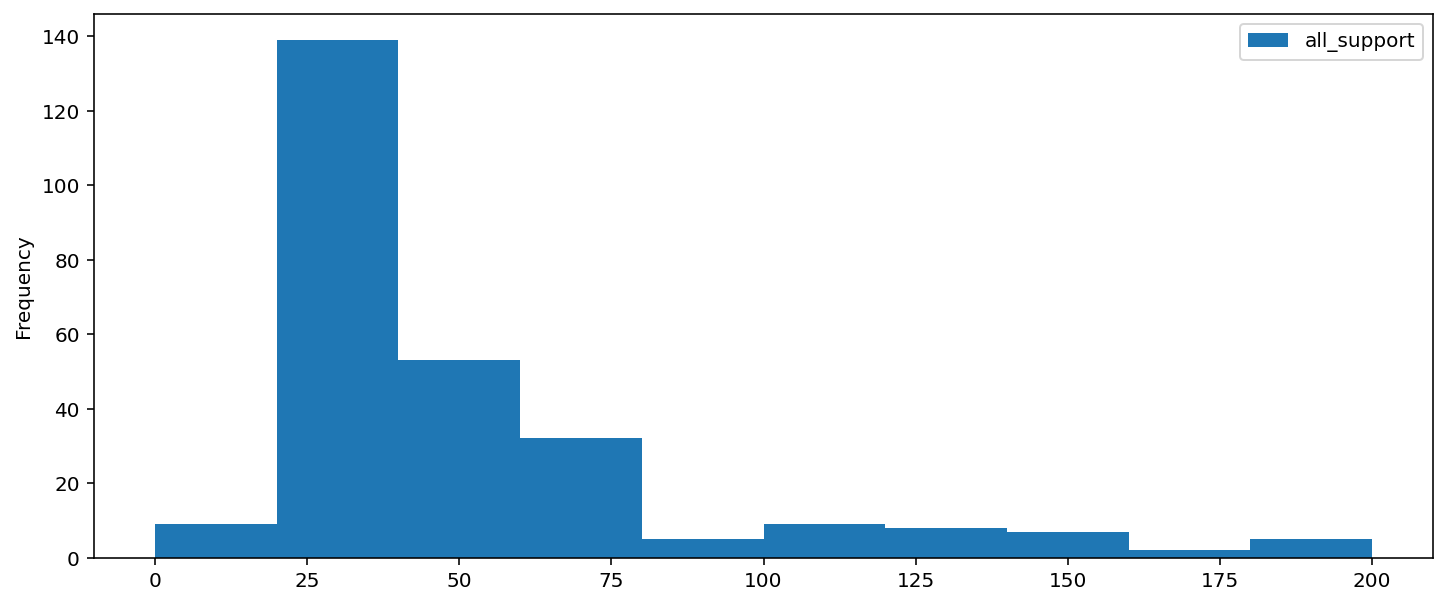

In [69]:
# Избавимся от записей до 2015 года
films_with_support = films_with_support.query('show_start_year >= 2015')
# Избавимся от пропусков в столбцах 'ratings' и 'box_office' (их не много)
films_with_support.dropna(subset=['ratings', 'box_office'], inplace=True)

# Изучим данные в столбце 'all_support' на выбросы
films_with_support.plot(kind='hist', y='all_support', range=(0, 200), figsize=(12, 5), bins=10)

In [70]:
films_with_support['all_support'].describe()

count    284.000000
mean      63.229394
std       72.735557
min        5.000000
25%       26.837500
50%       35.000000
75%       60.000000
max      500.000000
Name: all_support, dtype: float64

In [71]:
# Разобьём картины на категории в зависимости от объёма полученной поддержки от государства:
# 'low' — картины, которые получили до 26,84 миллиона
# 'medium' — картины, которые получили до 35 миллионов
# 'high' — финансирование до 60 миллионов
# 'extra' — финансирование до 86 миллионов (+ 1.5 межквартильных размаха к медиане)
# 'WOW' — финансирование свыше 86 миллионов, выбросы в данных

# И для каждой категории рассчитаем средний рейтинг. 
# Начнём с того, что создадим столбец 'support_category'


def make_support_category(total_support):
    if total_support < 26.84:
        return 'low'
    if total_support < 35:
        return 'medium'
    if total_support < 60:
        return 'high'
    if total_support < 86:
        return 'extra'
    return 'WOW'

films_with_support['support_category'] = films_with_support['all_support'].apply(make_support_category)

# Теперь создадим сводные таблицы для рассчёта максимального и среднего рейтинга каждой категории

max_ratings_to_category = films_with_support.pivot_table(index='support_category', values='ratings', aggfunc='max').reset_index().sort_values('support_category', ascending=False)
avg_ratings_to_category = films_with_support.pivot_table(index='support_category', values='ratings').reset_index().sort_values('support_category', ascending=False)
avg_ratings_to_category['ratings'] = round(avg_ratings_to_category['ratings'], 1)



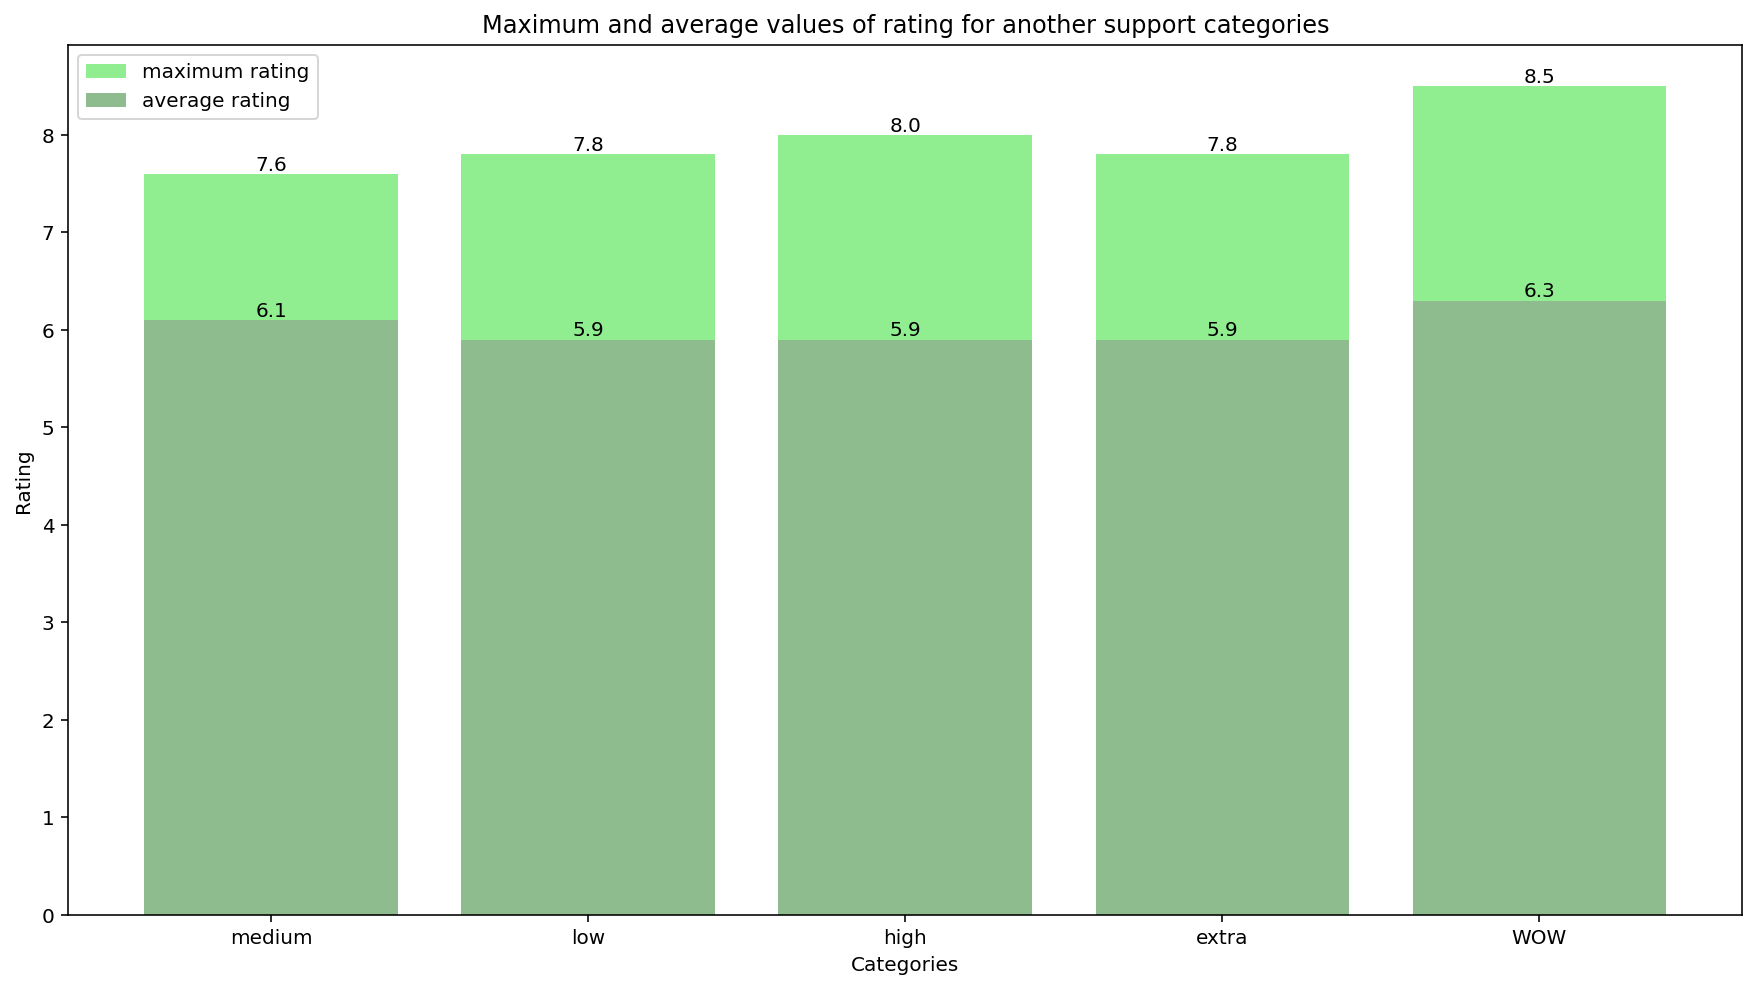

In [72]:
fig = plt.figure(figsize=(15, 8))

a = plt.bar(max_ratings_to_category['support_category'], max_ratings_to_category['ratings'], color='LightGreen', label='maximum rating')


for rect, label in zip(a.patches, max_ratings_to_category['ratings']):
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )
    
b = plt.bar(avg_ratings_to_category['support_category'], avg_ratings_to_category['ratings'], color='DarkSeaGreen', label='average rating')


for rect, label in zip(b.patches, avg_ratings_to_category['ratings']):
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )

plt.legend()
plt.title('Maximum and average values of rating for another support categories')
plt.xlabel('Categories')
plt.ylabel('Rating')

plt.show()

Мы видим, что в среднем значение рейтинга фильмов, которые принадлежат к категории поддержки 'medium' (они получили государственное финансирование от 26,84 до 35 миллионов) выше, чем у фильмов категорий 'low', 'high' и 'extra'. 
Самые высокие значения рейтинга (как максимальные, так и средние) можно наблюдать в категории 'WOW' — государственное финансирование таких фильмов было существенно выше, чем во всех остальных категориях.
На основании таких данных можно утверждать, что рейтинг картины в основном не зависит от объёма государственной подержки, однако в случае сильно высоких значений объёма государственной поддержки можно увидеть чуть более высокие значения среднего и максимального рейтинга. Когда картина получает свыше 86 миллионов из государственного бюджета, она гарантированно получает более высокий рейтинг. Изучим как обстоят дела с окупаемостью картин в зависимости от категорий, в которые мы их поместили.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Честно говоря выглядит так, что в господдержку входят и рейтинги 😅
    
</div>

In [73]:
# Добавим таблице столбец 'is_payback', который будет содержать логические значения: True если картина окупилась и 
# False, если нет.

def make_payback_category(row):
    all_support = row['all_support']
    boxes = row['box_office']
    if boxes - all_support > 0:
        return True
    return False

films_with_support['is_payback'] = films_with_support.apply(make_payback_category, axis=1)

# Создадим две сводные таблицы: одну для количества фильмов для каждого из значений столбца support_category
# И одну для количества фильмов из каждой категории, затраты для которых окупились

all_films_to_category = films_with_support.pivot_table(index='support_category', values='puNumber', aggfunc='count').reset_index()
true_films_to_category = films_with_support.pivot_table(index='support_category', values='is_payback', aggfunc='sum').reset_index()



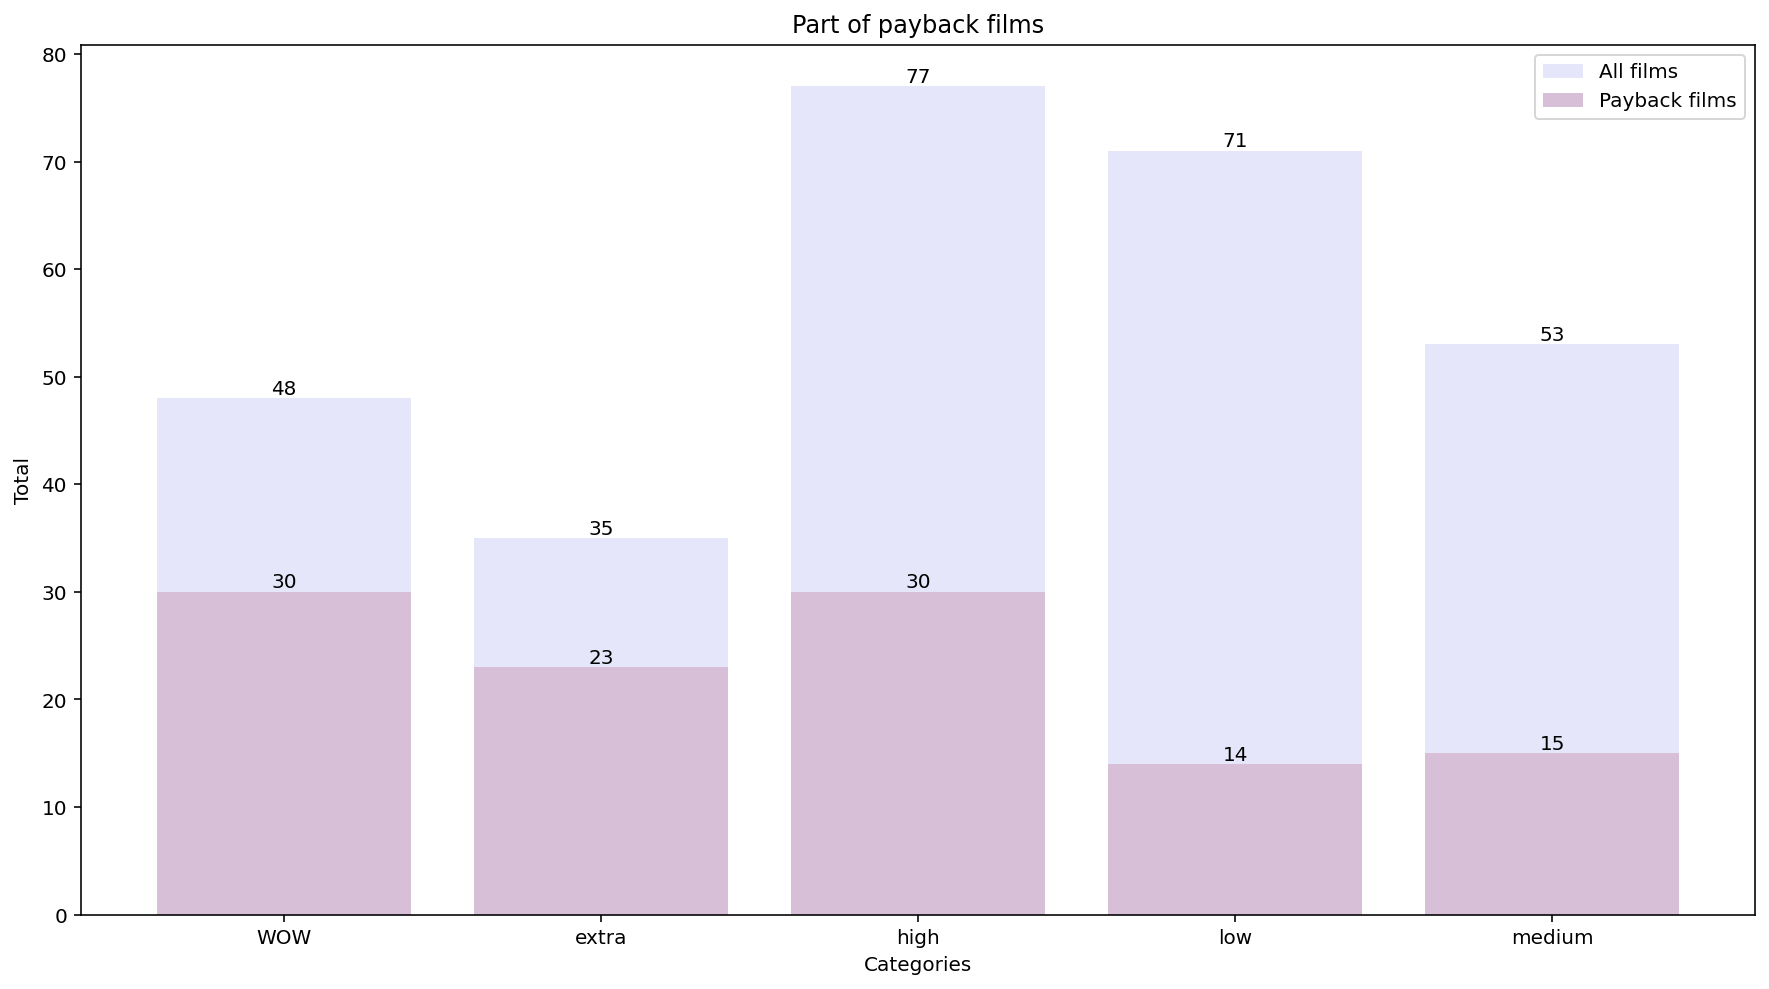

In [74]:
fig = plt.figure(figsize=(15, 8))

a = plt.bar(all_films_to_category['support_category'], all_films_to_category['puNumber'], color='Lavender', label='All films')


for rect, label in zip(a.patches, all_films_to_category['puNumber']):
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )
    
b = plt.bar(true_films_to_category['support_category'], true_films_to_category['is_payback'], color='Thistle', label='Payback films')


for rect, label in zip(b.patches, true_films_to_category['is_payback']):
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        label,
        ha="center",
        va="bottom"
    )

plt.legend()
plt.title('Part of payback films')
plt.xlabel('Categories')
plt.ylabel('Total')

plt.show()

Можно проследить закономерность: чем больше средств из финансового бюджета получила картина, тем больше шансов у неё на окупаемость. Объединим таблицы all_films_to_category и true_films_to_category по столбцу 'support_category' для более точного рассчёта доли фильмов с окупаемостью из каждой категории и построения наглядного графика.

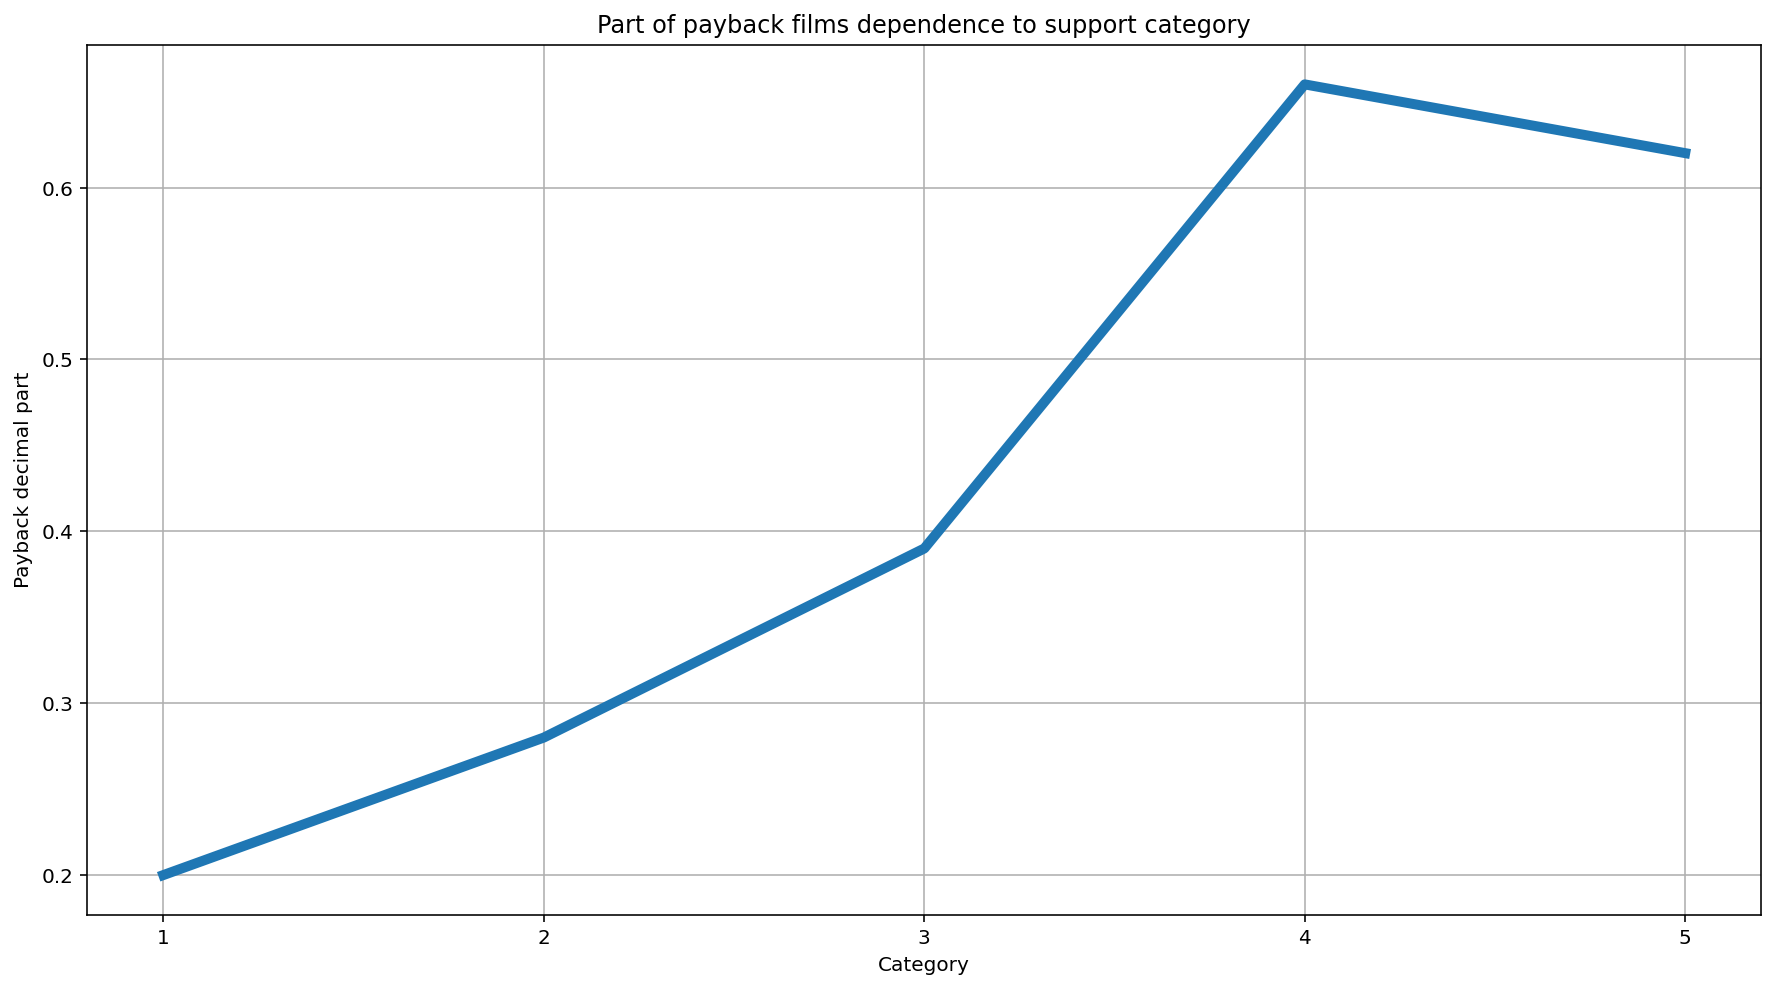

In [75]:
films_to_category = true_films_to_category.merge(all_films_to_category, on='support_category', how='inner') 
films_to_category.columns = ['category', 'true_payback', 'all_flims']

# Присвоим категориям порядковые номера, чтобы получились ранговые переменные
films_to_category.loc[films_to_category['category'] == 'WOW', 'category'] = 5
films_to_category.loc[films_to_category['category'] == 'extra', 'category'] = 4
films_to_category.loc[films_to_category['category'] == 'high', 'category'] = 3
films_to_category.loc[films_to_category['category'] == 'medium', 'category'] = 2
films_to_category.loc[films_to_category['category'] == 'low', 'category'] = 1

# Привели к целочисленному типу значения столбца 'category' для математических действий с ними
films_to_category['category'] = films_to_category['category'].astype('int')

# Отсортировали по типу категории
films_to_category.sort_values('category', inplace=True)

# Создали столбец со значениями доли фильмов, которые окупились.
films_to_category['payback_part'] = round(films_to_category['true_payback'] / films_to_category['all_flims'], 2)

# Рассчитаем коэффициент корелляции Пирсона
films_to_category['category'].corr(films_to_category['payback_part'])

# Значение 0.94 говорит о том, что, если принять как факт то, что взаимосвязь есть, то такая взаимосвязь очень сильная
# Построим график

films_to_category['category'] = films_to_category['category'].astype('str') # Возвращаем тип str для наглядности графика

fig = plt.figure(figsize=(15, 8))
plt.plot(films_to_category['category'], films_to_category['payback_part'], linewidth=5)
plt.title('Part of payback films dependence to support category')
plt.xlabel('Category')
plt.ylabel('Payback decimal part')
plt.grid(which='major')

plt.show()

Зависимость между объёмом государственного финансирования и долей окупаемости картин установлена: чем больше объём финансирования, тем выше процент окупаемости фильмов.

Теперь изучим характерные особенности картин, снятых на студиях, которые наибольшее количество раз получали государственную поддержку. Выясним, существует ли какое-то объяснение тому, что именно этим студиям так часто выделяли средства из бюджета. Сравним результаты с фильмами, которые были сняты на студиях, для которых выделяли финансирование однажды.

In [76]:
# Посмотрим, какие киностудии в топе, по количеству фильмов с господдержкой
films_with_support['film_studio'].value_counts().head(10)

ООО "Студия анимационного кино "Мельница"    7
ООО "Кинокомпания "СТВ"                      6
ООО "ТаББаК"                                 6
ООО "Каро Продакшн"                          4
ООО "Продюсерский центр "Ленфильм"           4
ООО "ВИЗАРТ ФИЛЬМ"                           4
ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                    3
ООО "Студия "СЛОН"                           3
ООО "Компания "Новые люди"                   3
АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"    3
Name: film_studio, dtype: int64

Первые 6 киностудий нам подойдут. Они дадут в сумме 31 фильм. Отберём столько же фильмов, снятых на киностудиях, которым была оказана государственная поддержка один раз.

In [77]:
films_with_support['film_studio'].value_counts().tail(31)

ООО "Пан-Атлантик Студио", Homeless Bob, Arizona Productions                                             1
ООО "Студия Продюсерского Кино"                                                                          1
ООО "Фреш-Фильм"                                                                                         1
ООО "Энджой Мувиз"                                                                                       1
ООО "РЕНОВАЦИО интертейнмент"                                                                            1
ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн"                       1
ООО "Студия "8 рядов"                                                                                    1
ООО "Русские Золотые Серии"                                                                              1
ООО "КИНОДАНЦ", ООО "ЦЕНТРОКИНО"                                                                         1
ООО "Киностудия "АРК-ФИЛЬМ"          

In [78]:
# Сохранили названия киностудий из топ-6 в списке
top_film_studios = list(films_with_support['film_studio'].value_counts().head(6).index)

# Сохранили названия 31 киностудии, на которой было снято по одному фильму
tail_film_studios = list(films_with_support['film_studio'].value_counts().tail(31).index)

# Создали два датафрейма для хранения информации о фильмах из двух разных выборок
top_studio_films = films_with_support.query("film_studio in @top_film_studios")
tail_studio_films = films_with_support.query("film_studio in @tail_film_studios")

#Убедились, что датафреймы имеют одинаковое число строк
len(top_studio_films) == len(tail_studio_films)

True

<AxesSubplot:title={'center':'Rating distribution for top-studios-films and another-studios-films'}, ylabel='Frequency'>

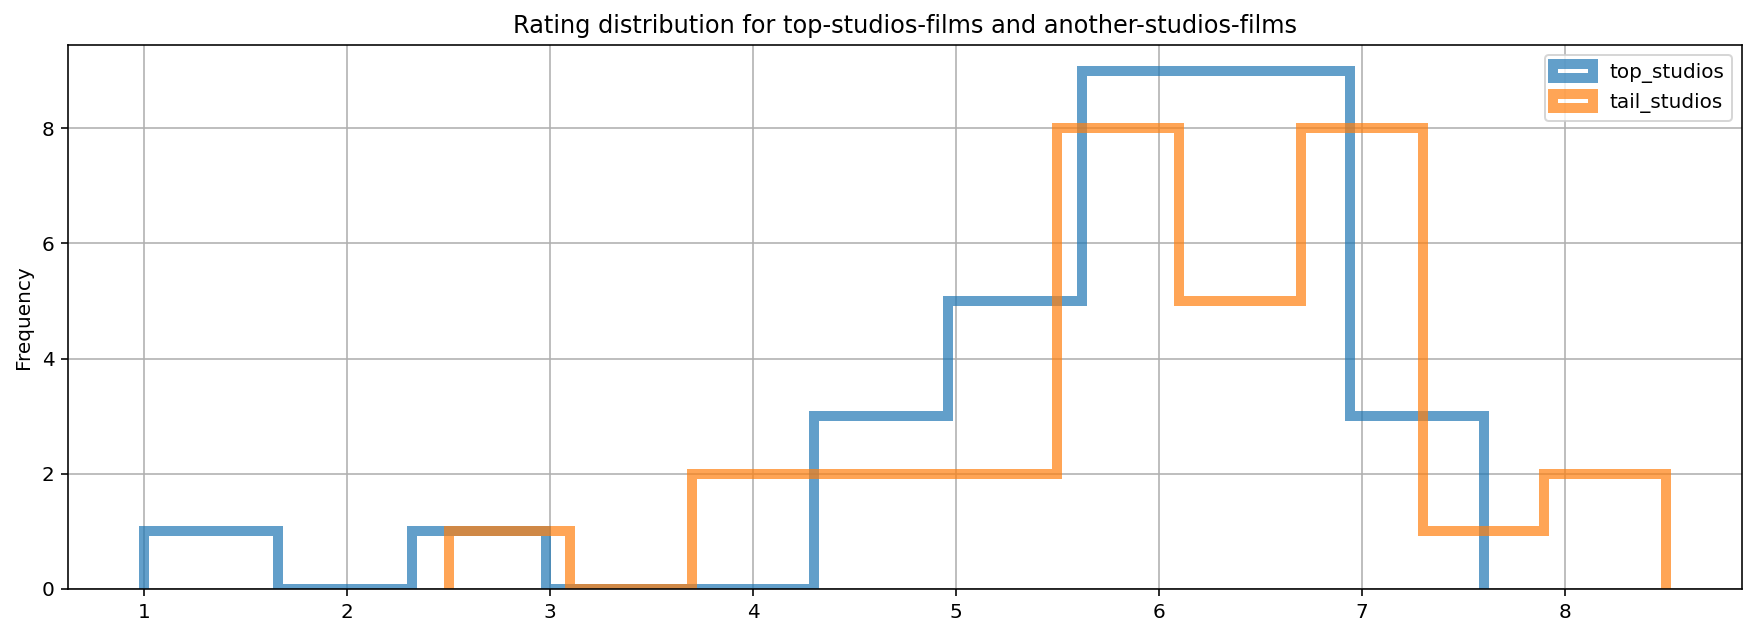

In [79]:
# Ознакомимся с распределением рейтингов с помощью гистгорамм
ax = top_studio_films.sort_values('ratings').plot(kind='hist', 
                                                  y='ratings', 
                                                  histtype='step', 
                                                  linewidth=5,
                                                  alpha=0.7,
                                                  label='top_studios',
                                                  bins=10)

tail_studio_films.sort_values('ratings').plot(kind='hist',
                                              y='ratings', 
                                              histtype='step', 
                                              linewidth=5,
                                              alpha=0.7,
                                              label='tail_studios',
                                              ax=ax,
                                              grid=True,
                                              legend=True,
                                              bins=10,
                                              figsize=(15, 5),
                                              title='Rating distribution for top-studios-films and another-studios-films')


Гистограмма показывает, что количество фильмов, которые были сняты на студиях из топ-6 и имеющих рейтинг в диапазоне от 5.5 до 7 пунктов выше, чем количество фильмов с аналогичным рейтингом, снятых на «остальных киностудиях». Однако фильмы, снятые на «остальных киностудиях» чаще имеют рейтинг от 7 до 7.5, а также имеют 3 фильма, рейтинг которых выше, чем в фильмах top_studios.
Изучим данные более детально. 

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
Буквально блестящая работа 🌟
    
</div>

In [80]:
top_studio_films['ratings'].describe()

count    31.00000
mean      5.83871
std       1.31572
min       1.00000
25%       5.45000
50%       6.20000
75%       6.65000
max       7.60000
Name: ratings, dtype: float64

In [81]:
tail_studio_films['ratings'].describe()

count    31.000000
mean      6.009677
std       1.232979
min       2.500000
25%       5.650000
50%       6.100000
75%       6.800000
max       8.500000
Name: ratings, dtype: float64

У фильмов, которые были сняты на топ-6 киностудий ниже показатели среднего и медианного значения рейтинга, выше показатель стандартного отклонения — это говорит о том, что изменчивость выборки, взятой из топ-6 киностудий выше, чем у выборки, взятой по «остальным киностудиям».
Можно сделать вывод, что причина, по которой государство повторно финансирует одни и те же киностудии на создание картин заключается не в рейтинге этих картин. 

In [82]:
# Изучим долю окупаемости картин из топ-6 киностудий
top_studio_films['is_payback'].mean()

0.41935483870967744

In [83]:
# Изучим долю окупаемости картин «остальных киностудий»
tail_studio_films['is_payback'].mean()

0.3548387096774194

Доля окупаемости картин, снятых на киностудиях из топ-6 действительно выше. Разница в 6% не настолько высока, чтобы можно было утверждать о том, что истинная причина повторного финансирования заключается в более высоком проценте окупаемости.

In [84]:
# Изучим возрастную аудиторию

top_studio_films.pivot_table(index='age_restriction', values='puNumber', aggfunc='count').reset_index().sort_values('puNumber', ascending=False)

,age_restriction,puNumber
4,«6+» - для детей старше 6 лет,17
2,«16+» - для детей старше 16 лет,6
1,«12+» - для детей старше 12 лет,5
3,«18+» - запрещено для детей,2
0,«0+» - для любой зрительской аудитории,1


In [85]:
tail_studio_films.pivot_table(index='age_restriction', values='puNumber', aggfunc='count').reset_index().sort_values('puNumber', ascending=False)

,age_restriction,puNumber
0,«12+» - для детей старше 12 лет,17
1,«16+» - для детей старше 16 лет,9
2,«18+» - запрещено для детей,3
3,«6+» - для детей старше 6 лет,2


Фильмы, снятые на топ-6 киностудий ориентированы преимущественно на аудиторию 6+ — таких картин 17 и это подавляющее большинство, тогда как большая часть фильмов, снятых на «остальных киностудиях» предназначены для просмотра аудитории 16+.
Аудитория зрителей фильмов, которые были сняты на топ-6 киностудии моложе. В доказательство этому утверждению можем рассчитать «средний возраст зрителя», которому подходят фильмы, снятые на топ-6 киностудий и на «остальных киностудиях»

In [86]:
(6 * 17 + 16 * 6 + 12 * 5 + 18 * 2) / 31 # 9,5 лет типичному зрителю

9.483870967741936

In [87]:
(16 * 13 + 12 * 11 + 6 * 6 + 18) / 31 # Типичный зритель — уже подросток

12.709677419354838

Теперь изучим средний объём государственной поддержки для фильмов, которые получают её повторно и для фильмов, которые её повторно не получают.

In [88]:
top_studio_films['all_support'].mean()

73.88712903225807

In [89]:
tail_studio_films['all_support'].mean()

73.0758064516129

В среднем объём государственной поддержки для фильмов, которые получают её повторно, вдвое выше, чем у фильмов, которые не получали повторную поддержку. Получается, государство заинтересовано в постоянном сотрудничестве с одними и теми же киностудиями. Любопытно!

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  
    
![](https://i.gifer.com/74jy.gif)
    
</div>

In [90]:
# Изучим чистую прибыль, которую принесли фильмы, снятые на топ-6 киностудий:
top_studio_films['box_office'].sum() - top_studio_films['all_support'].sum()

3882.7029999999995

In [91]:
# Изучим чистую прибыль, которую принесли фильмы, снятые на киностудиях, повторное финансирование которых не происходило
tail_studio_films['box_office'].sum() - tail_studio_films['all_support'].sum()

758.7789999999995

In [92]:
print('Чистая прибыль, которую приносят картины, снятые на студиях с повторным финансированием выше в {:.1f} раза'.format(3882 / 2979))

Чистая прибыль, которую приносят картины, снятые на студиях с повторным финансированием выше в 1.3 раза


Мы изучили разницу между фильмами, снятыми на киностудиях, которым государство оказывало поддержку повторно и фильмами, которым повторная поддержка со стороны государства оказана не была. Причина кроется не в рейтинге: рейтинг фильмов, которые не получали господдержку чаще оказывался выше, однако прибыль, которую приносят фильмы, получающие повторную государственную поддержку в среднем выше в 1,3 раза. Вероятно, по этой причине средний объём государственной поддержки для киностудий, которым такая поддержка оказывается повторно, вдвое выше. Среди характерных особенностей можно выделить то, что картины, которые снимают на повторно финансируемых киностудиях ориентированы на более молодую аудиторию: типичный зритель — школьник начальных классов, тогда как типичным зрителем фильмов, снятых на киностудиях без повторного финансирования является подросток. Также можно заметить, что среди картин, которые государство финансирует повторно, наряду с художественными фильмами, гораздо чаще, чем среди картин, снятых на киностудиях без повторного финансирования, встречаются анимационные фильмы. Это может говорить о поощрении государством жанрового разнообразия.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  

Ты проделал тщательную работу, обозрев (есть такое слово?) данные о государственном финансировании с самых неожиданных сторон. Возможно даже вскрыл чьи-то близкие связи. Мое почтение 
    
![](https://media.giphy.com/media/l4q7TIW8nEZYOJUf6/giphy.gif)
</div>

### Шаг 5. Напишите общий вывод

В результате проведённого исследования удалось установить, что с каждым годом сумма кассовых сборов в прокате увеличивается, при этом среднее и медианное значение кассовых сборов из года в год нестабильно: это говорит о том, что в прокате ежегодно оказываются фильмы с весьма разными суммами сборов — их значение может быть как очень малым, так очень большим, что существенным образом влияет на изменчивость данных за каждый год. У зрителя с годами меняются вкусы, меняется и сам зритель: мы выяснили, что он молодеет — если в 2015-м году наибольшее среднее значение сборов было характерно для картин с возрастным ограничением 12+, то к 2019-му году лидерство укрепилось за возрастным ограничением 6+, однако наибольшую сумму кассовых сборов за изученнный период принесли картины с возрастной категорией 16+: это может говорить о том, что типичные представители данной возрастной категории чаще посещают кинотеатры, чем более молодые зрители. Количество картин, которые были выпущены в 2017-м году было минимальным в наших данных, но мы также выяснили, что 2017-й год был успешным годом для кинематографа: данные о сборах за этот год максимальные. 
Были изучены картины, получившие государственную поддержку и установлена прямая связь между объёмом государственной поддержки и долей окупаемости картин — чем больше объём поддержки от государства, тем больше шансов, что картина себя окупит. Также мы сравнили картины, снятые на киностудиях, получавших поддержку государства повторно с картинами, снятыми на киностудиях, которые получали поддержку от государства один раз и выяснили, что причина повторного финансирования не в высоких рейтингах (зачастую, более высокие оценки зрителей могут получать картины, снятые на киностудиях без повторного госфинансирования), а в скорее в совокупности некоторых факторов, характерных особенностей: это ориентированность на более молодую аудиторию зрителей, большее разнообразие жанров (доля анимационных фильмов выше у картин, которые были сняты на киностудиях с повторным финансированием) и можно говорить о том, что государство, будучи заинтересованным в повторном сотрудничестве, в таких случаях в среднем выделяет объём поддержки вдвое больший и картины, получившие такую поддержку в среднем приносят на 30% больше прибыли, чем картины, которые были сняты на киностудиях без повторного финансирования.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  

И вывод... чудесный вывод 🙌
</div>

<div style="border:solid purple 5px; padding: 20px"> 
Тобой проделана большая и чистая работа. Хоть есть несколько критических моментов, требующих доработки, но думаю, что ты с ними легко справишься ✋
    
    
Если у тебя будут возникать вопросы или же покажется, что что-то я пропустила при проверке, обязательно дай знать — чем тщательнее на этапе учебы будут разобраны детали, тем проще будет применять эти знания на практике.

С нетерпением жду твои правки 
    
![](https://i.gifer.com/iAe.gif)